In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [30]:
import pandas as pd

# Criando o dataset
data = {
    'Idade': [25, 44, 20, 39, 22, 48, 21, 53, 26, 50, 50],
    'Sexo':  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Inadimplente': [1,  0,  1,  0,  1,  0,  1,  0,  1,  0, 1]
}

# Convertendo para um DataFrame
df = pd.DataFrame(data)

# Exibindo o DataFrame
df


Idade  Sexo  Inadimplente
0      25     0             1
1      44     1             0
2      20     0             1
3      39     1             0
4      22     0             1
5      48     1             0
6      21     0             1
7      53     1             0
8      26     0             1
9      50     1             0
10     50     0             1

In [31]:
# Dividindo o dataset em treino e teste
X = df[['Idade', 'Sexo']]
y = df['Inadimplente']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Treinando o modelo de Random Forest
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 1.00


In [7]:
y_prob

array([[0.96, 0.04],
       [0.01, 0.99]])

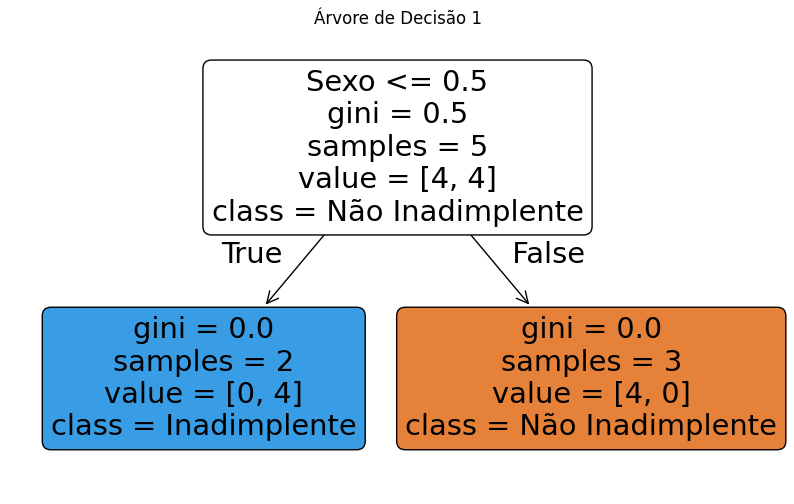

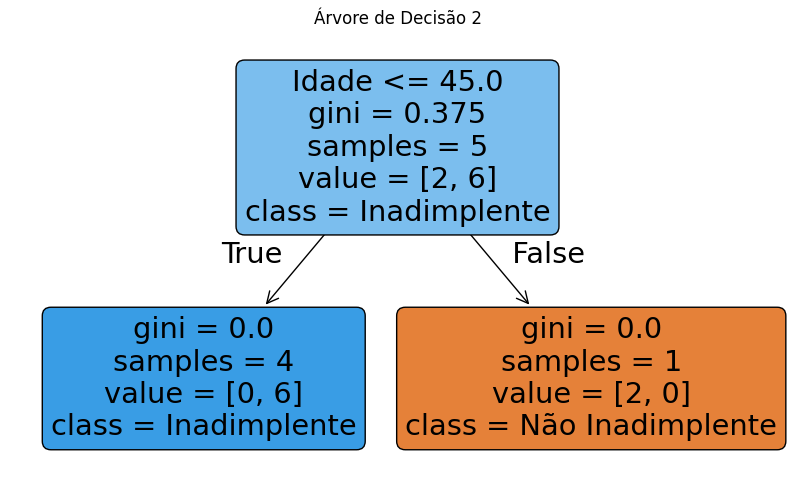

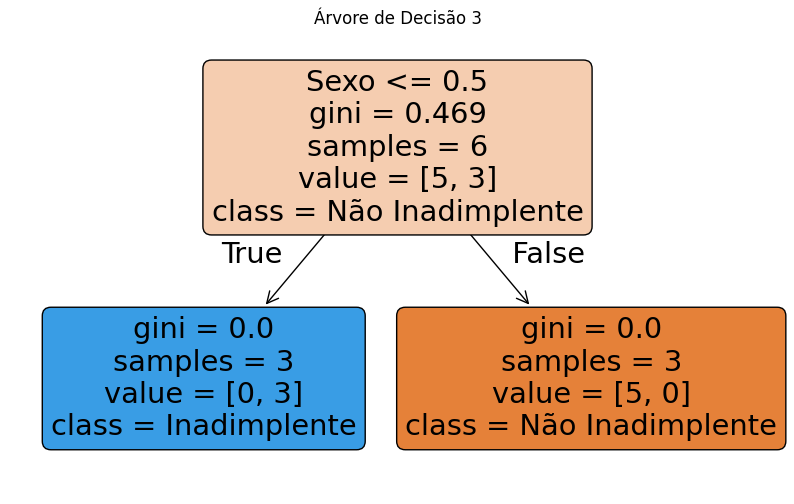

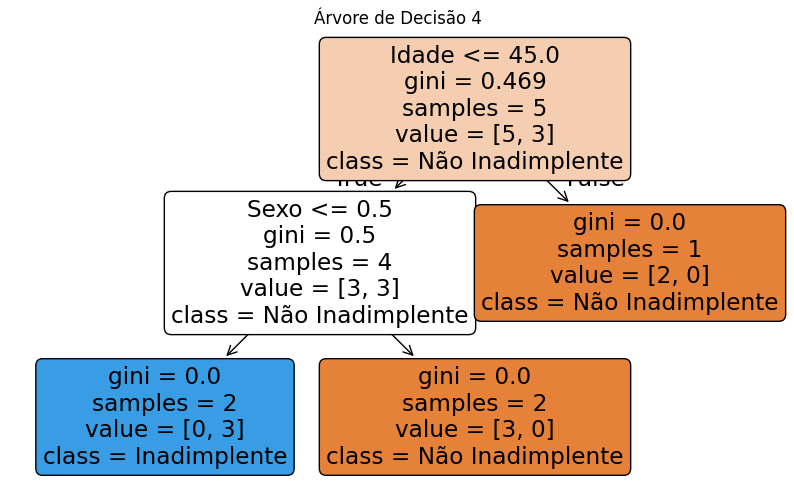

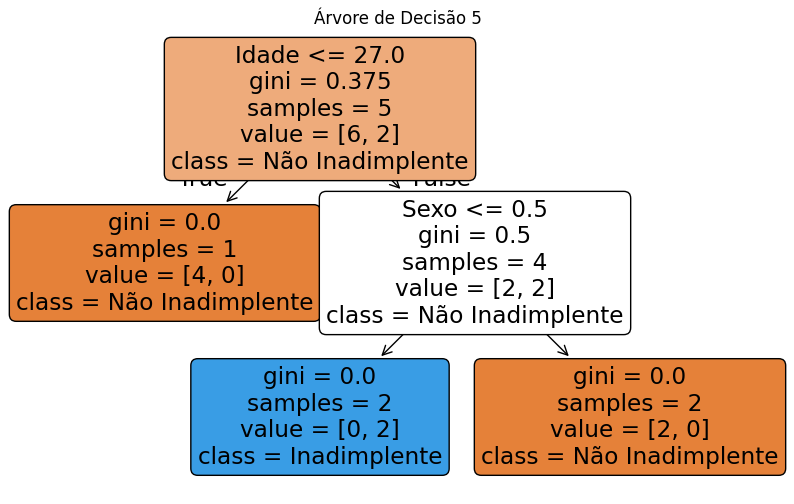

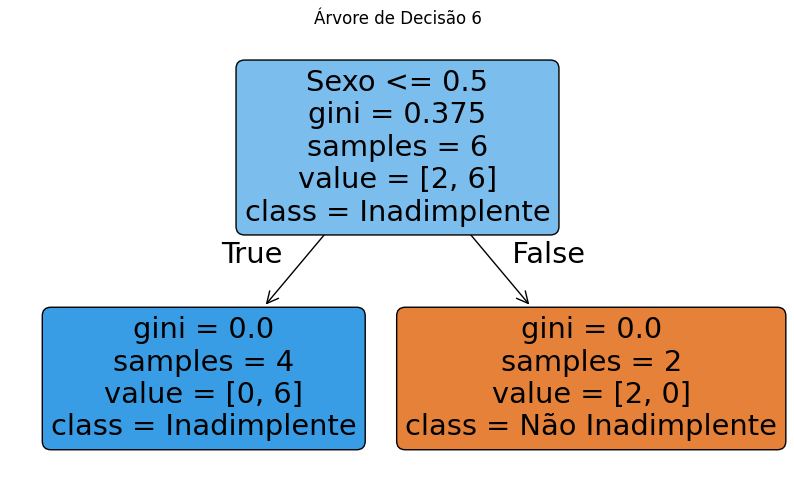

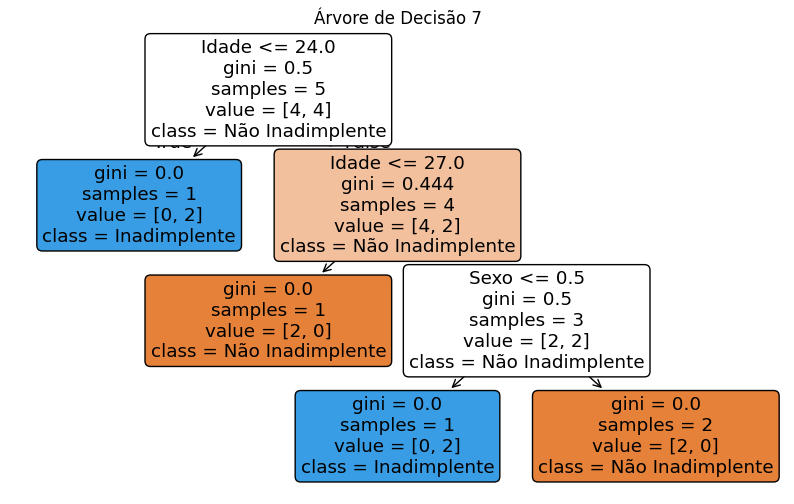

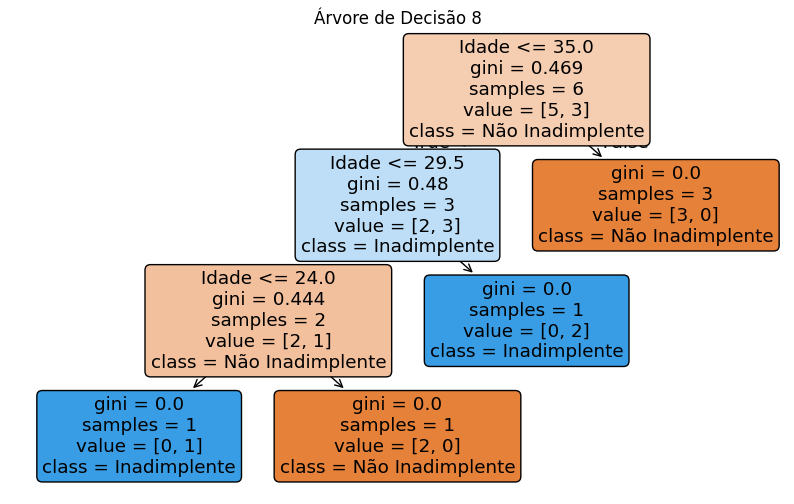

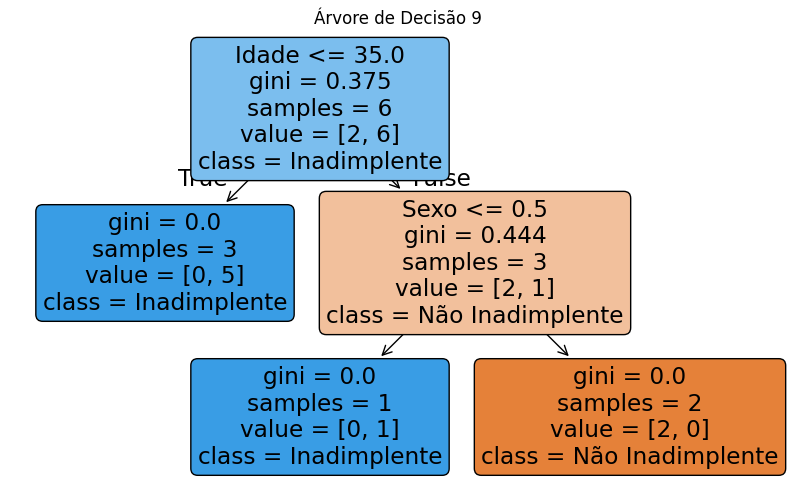

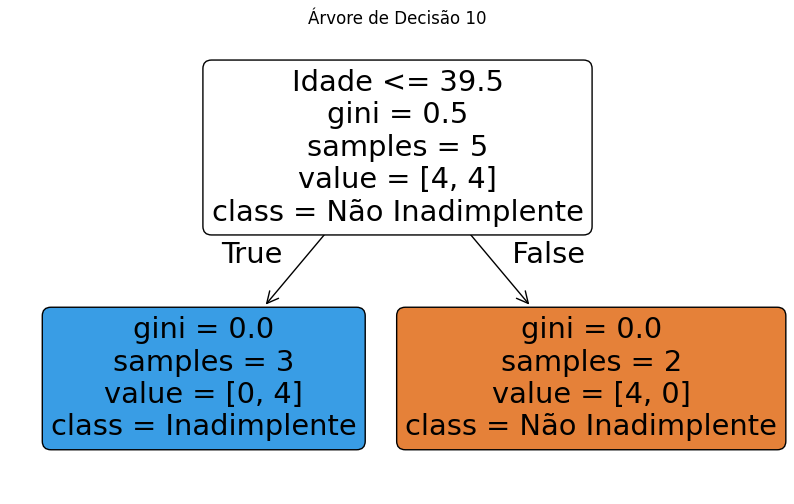

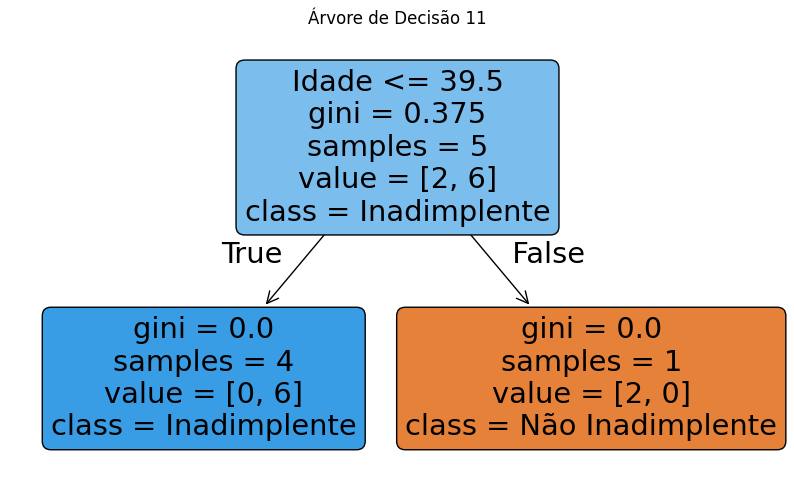

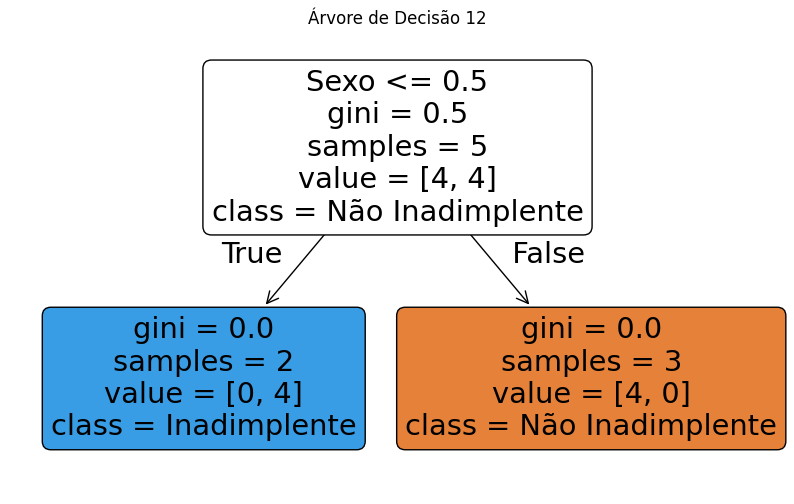

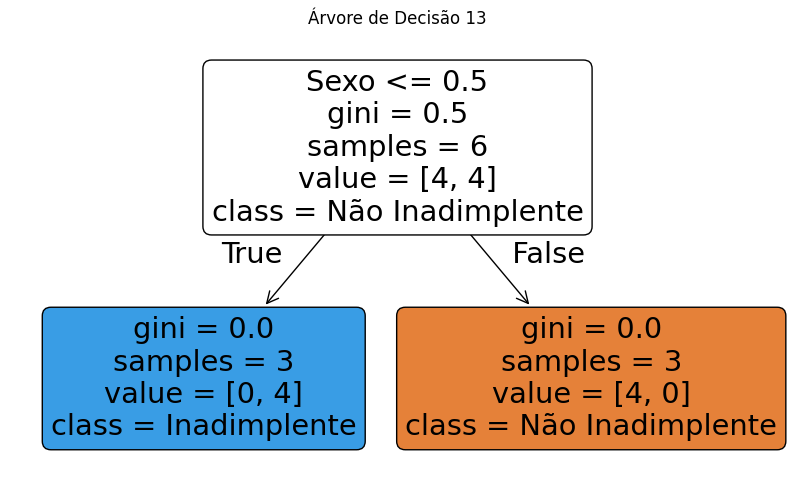

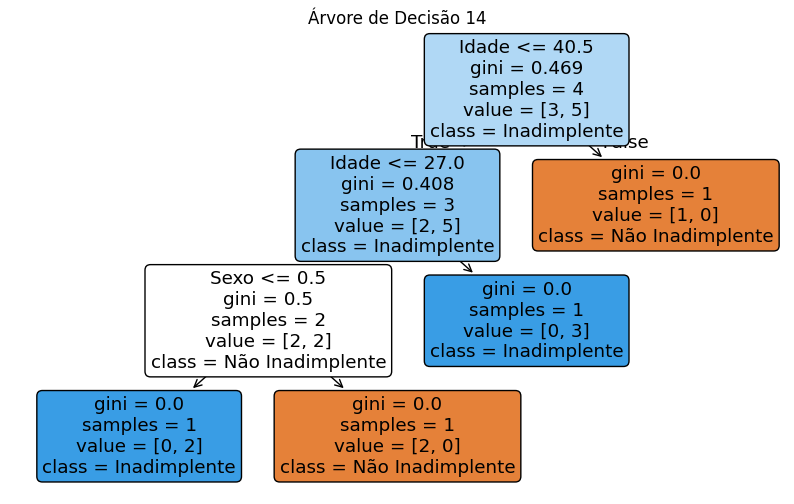

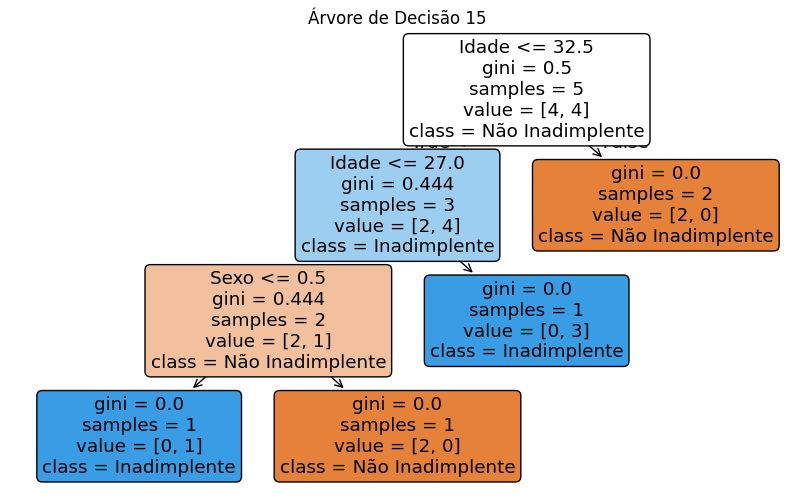

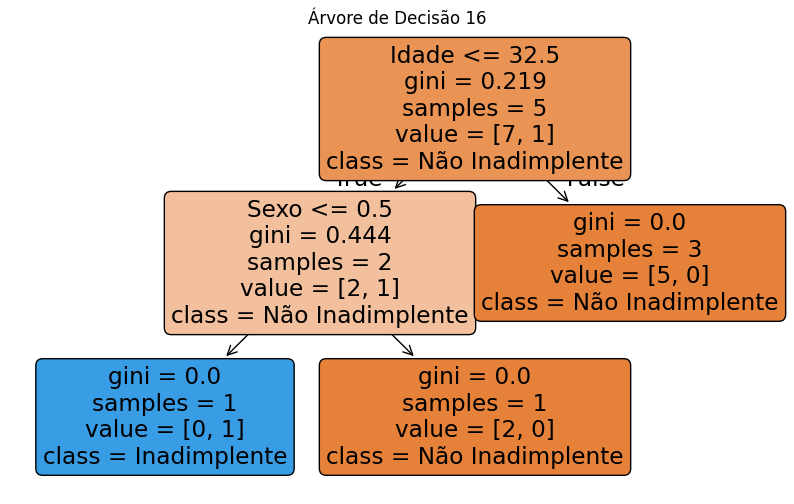

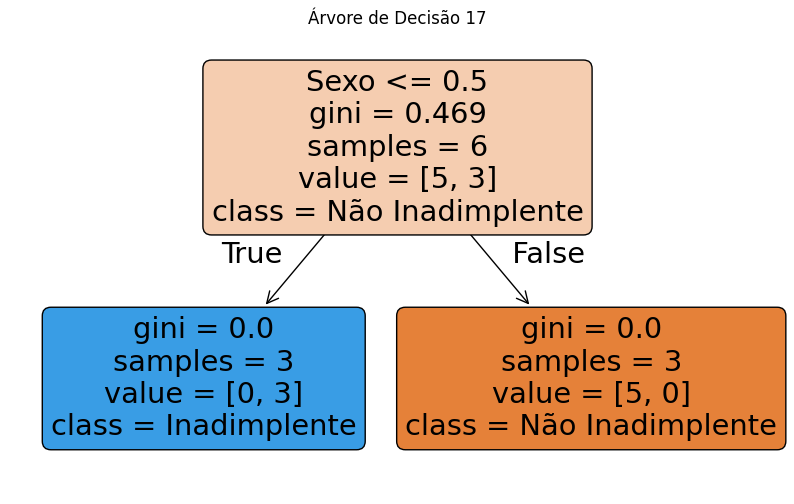

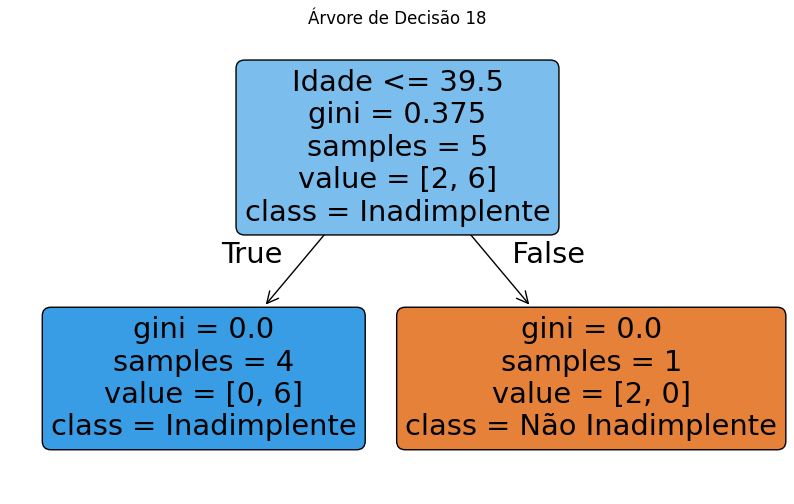

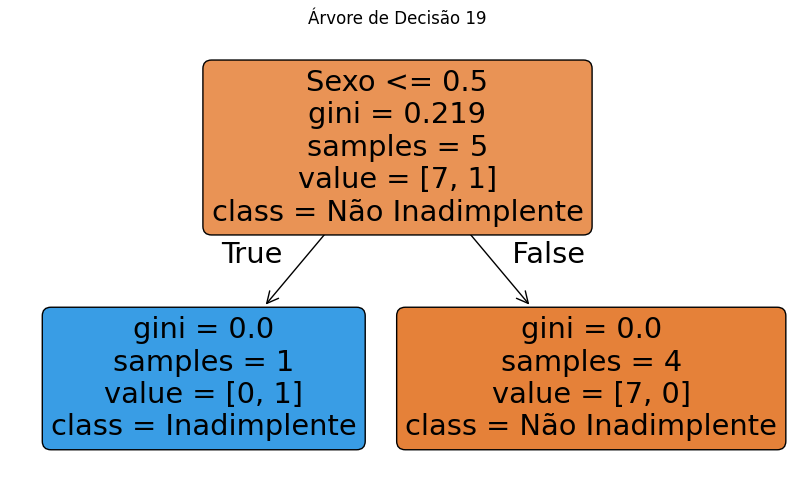

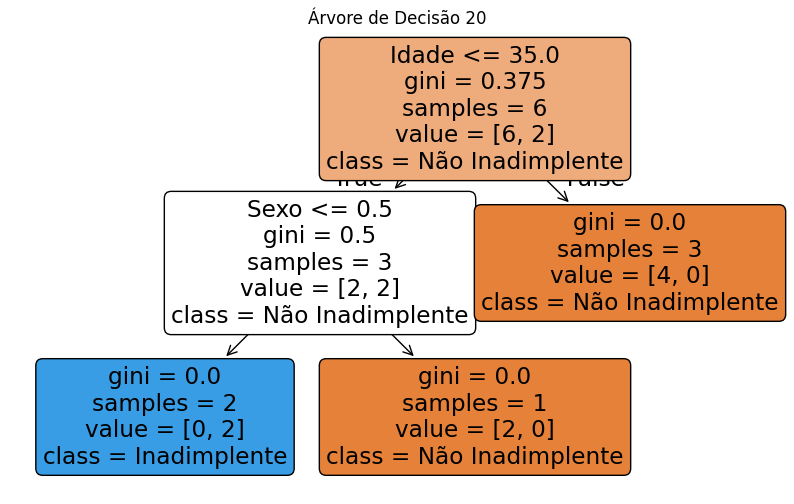

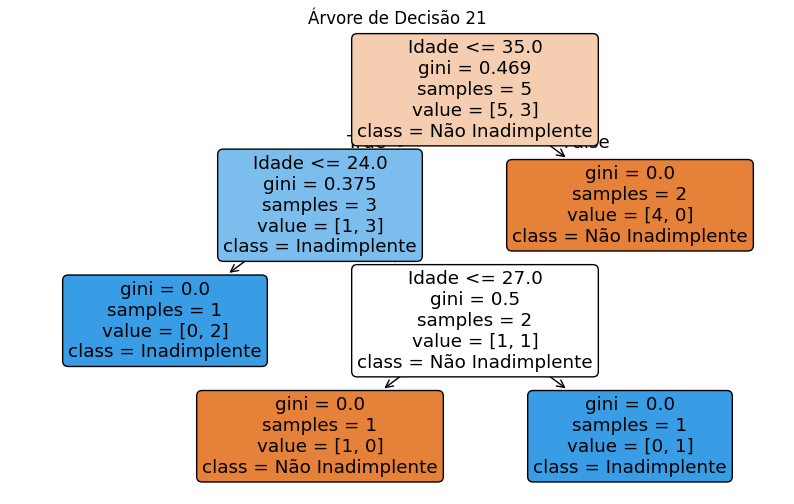

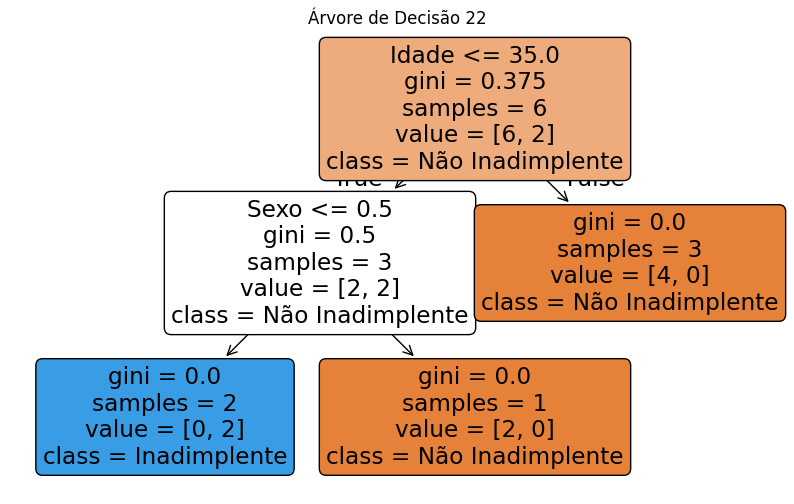

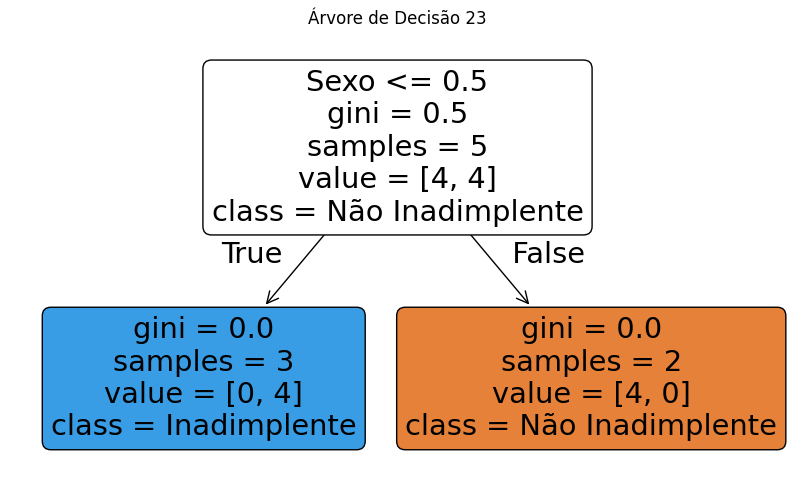

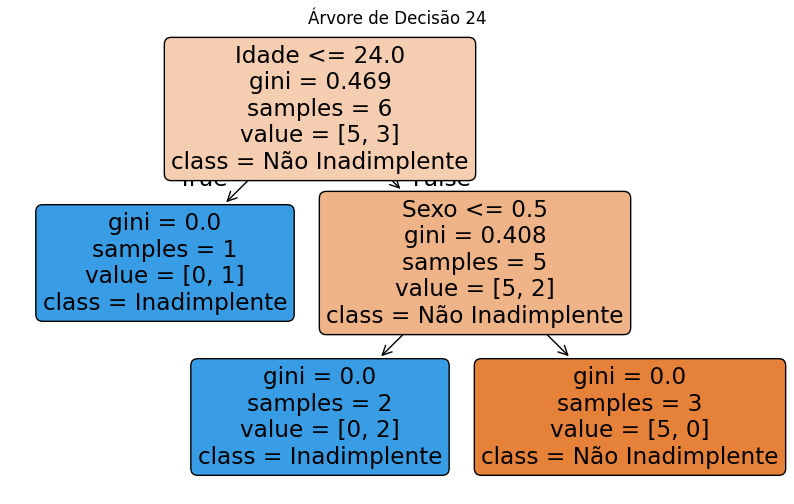

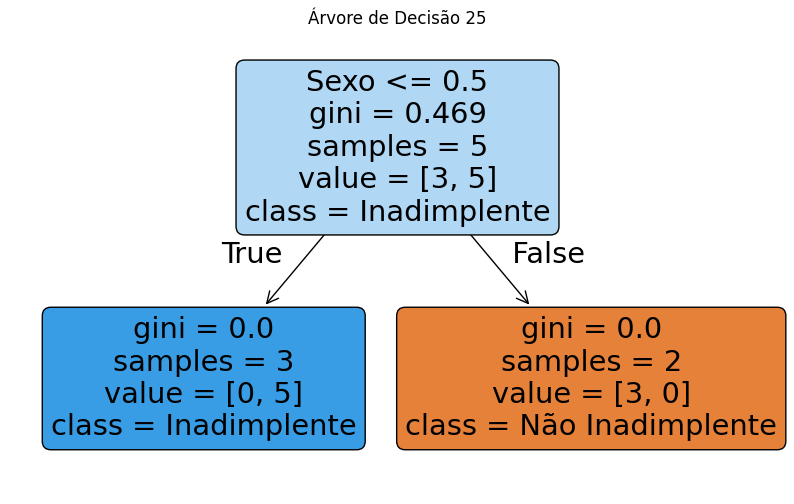

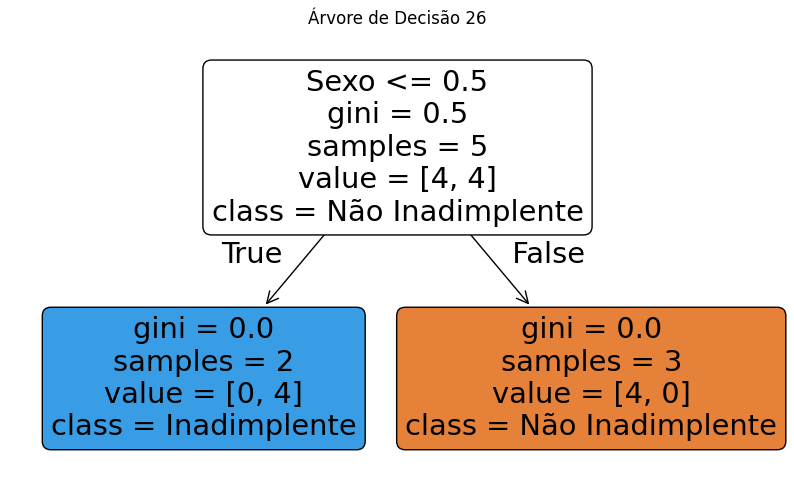

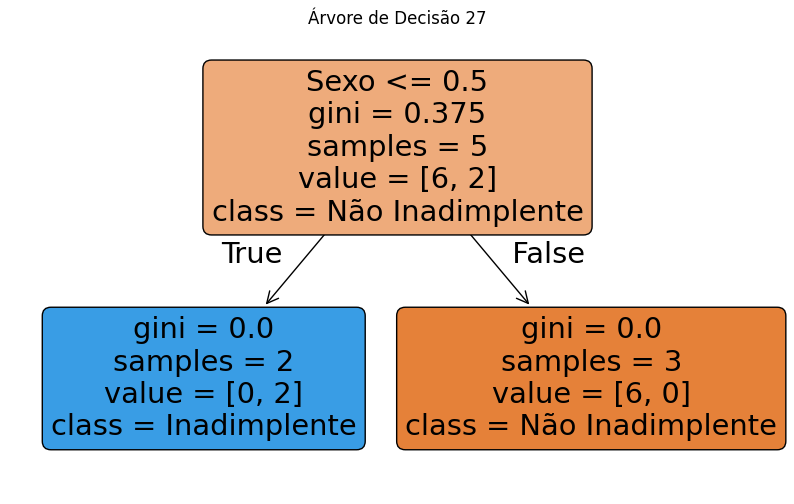

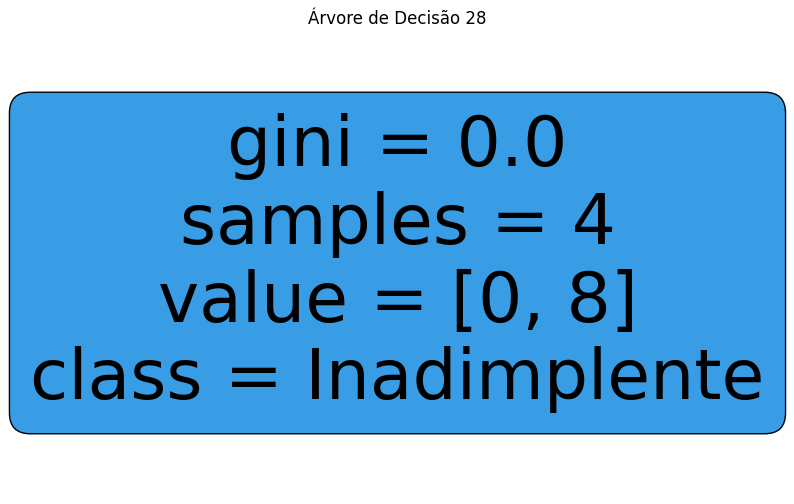

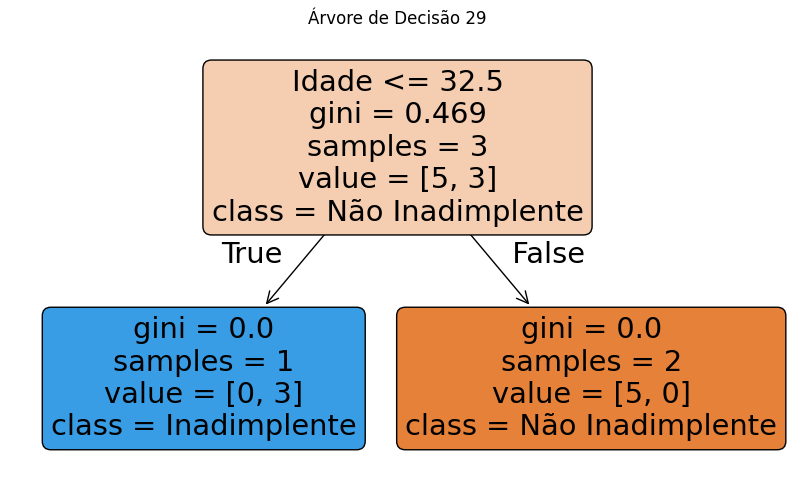

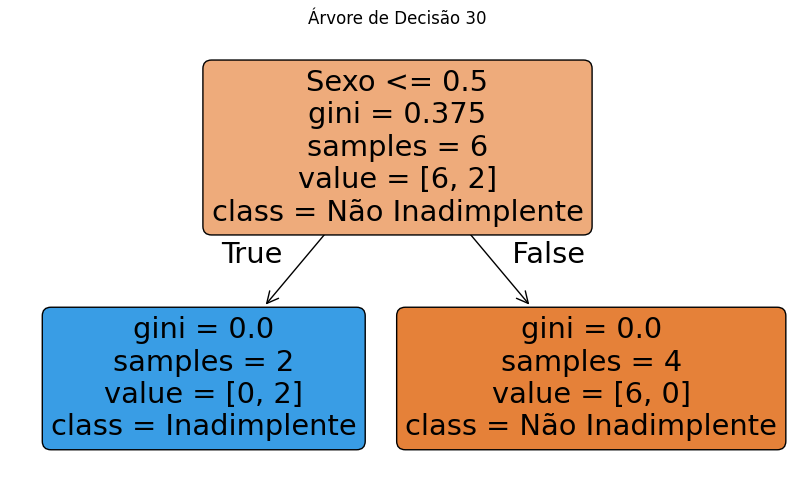

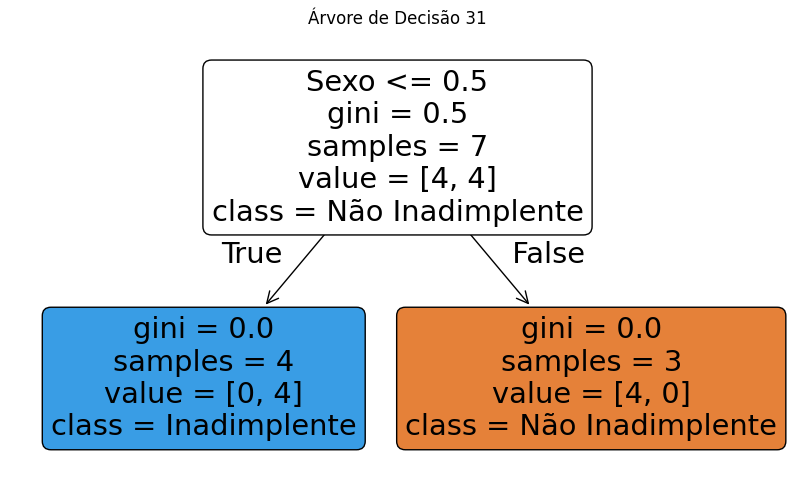

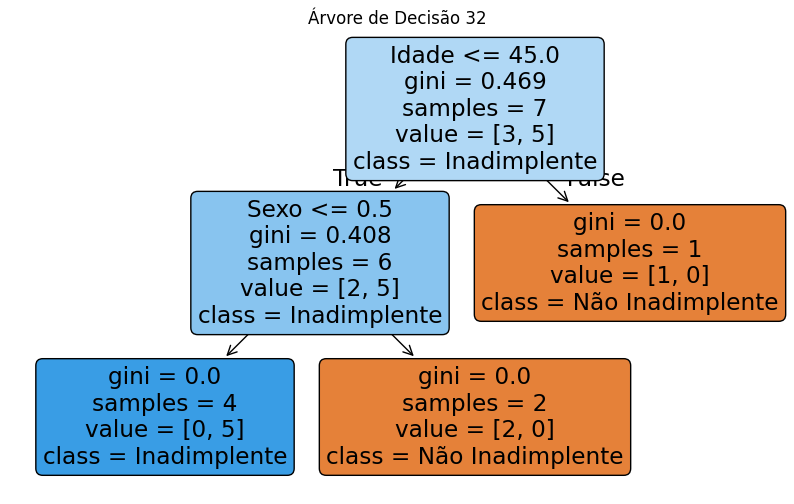

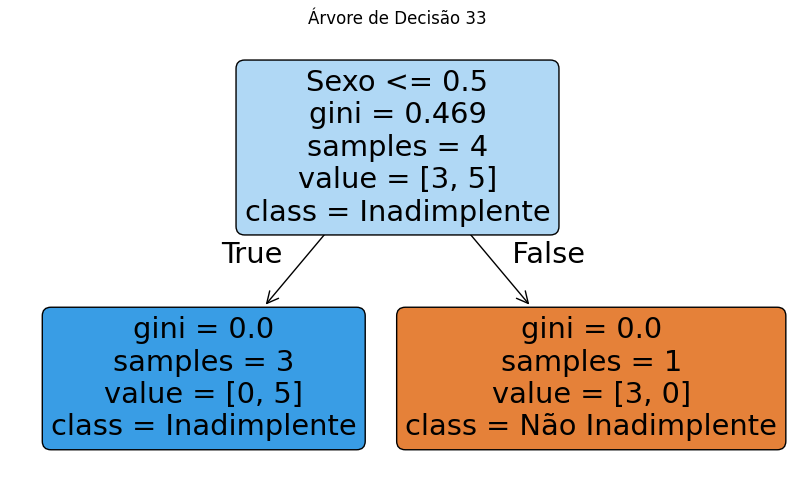

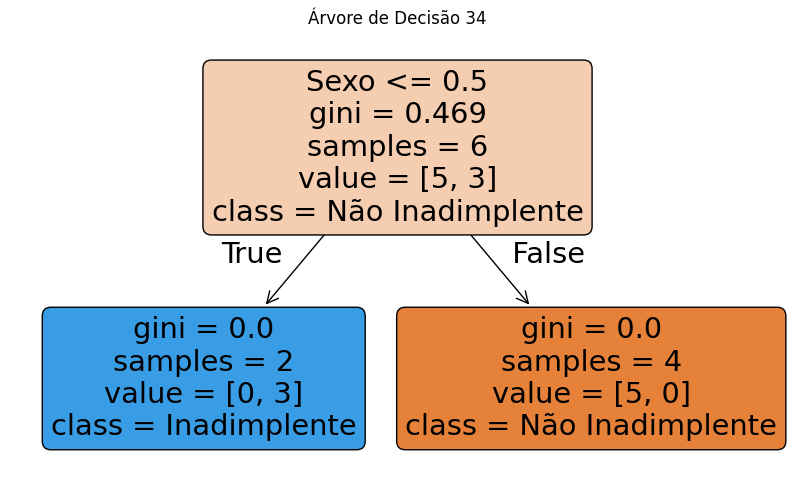

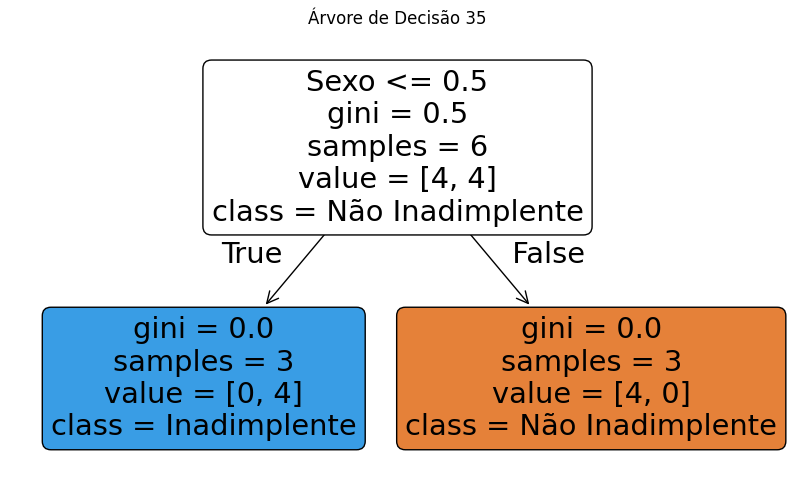

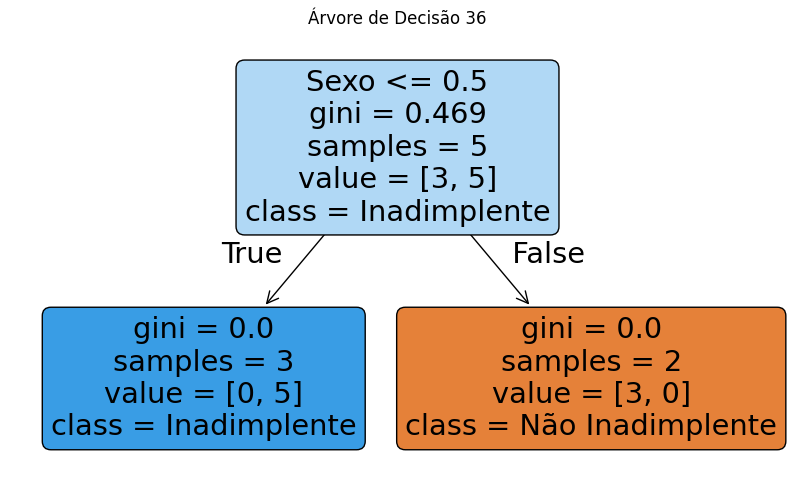

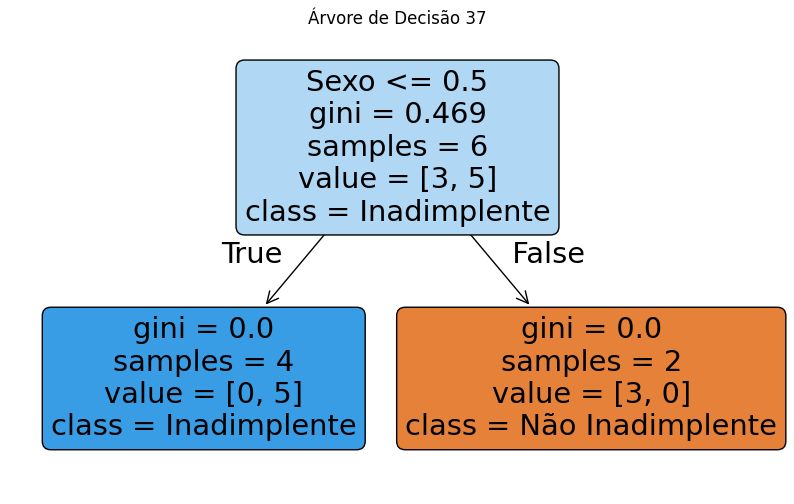

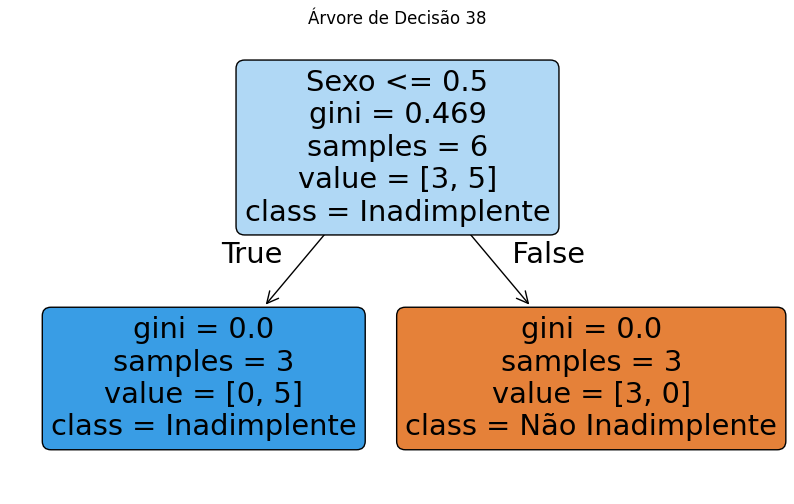

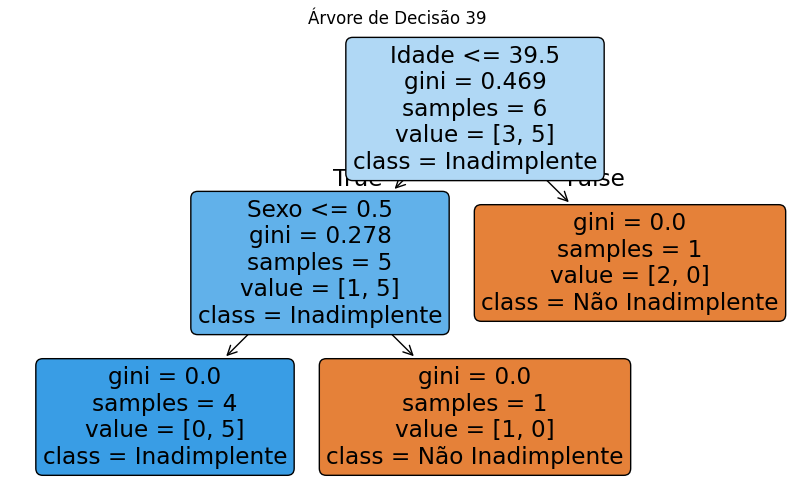

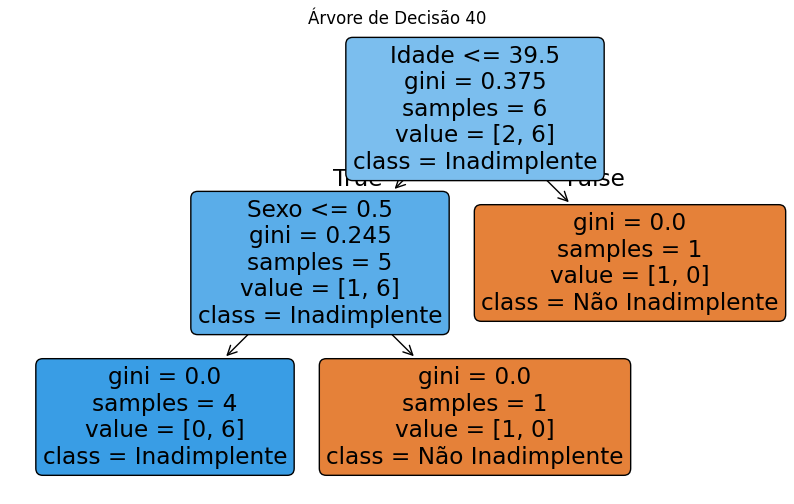

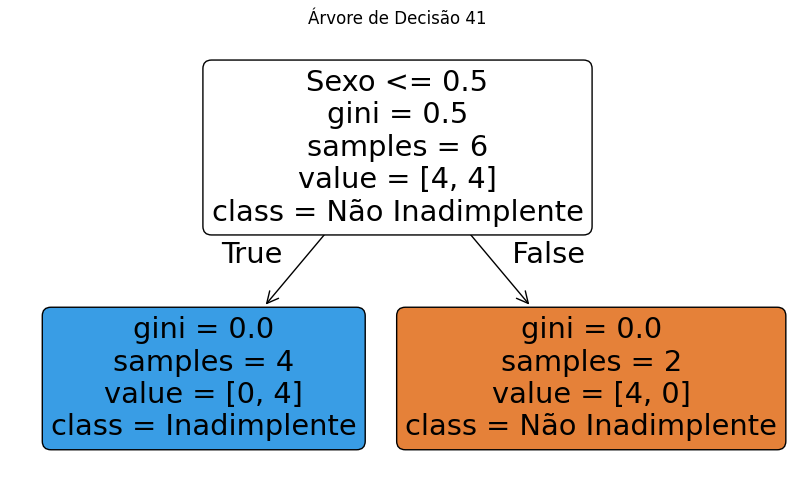

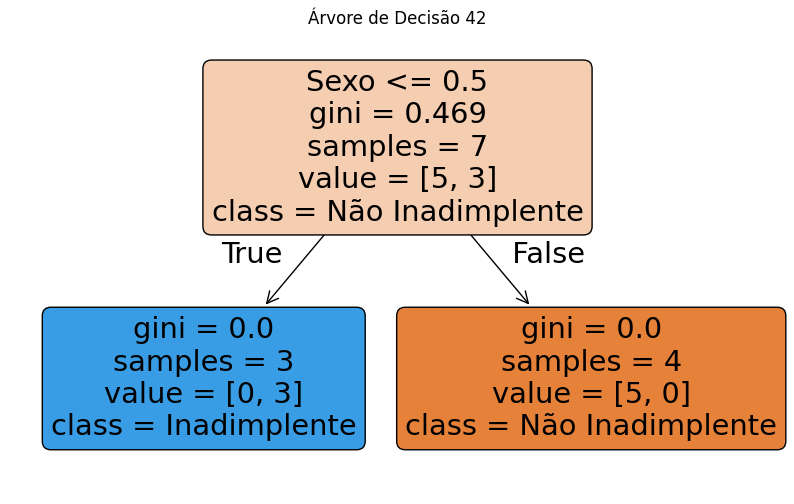

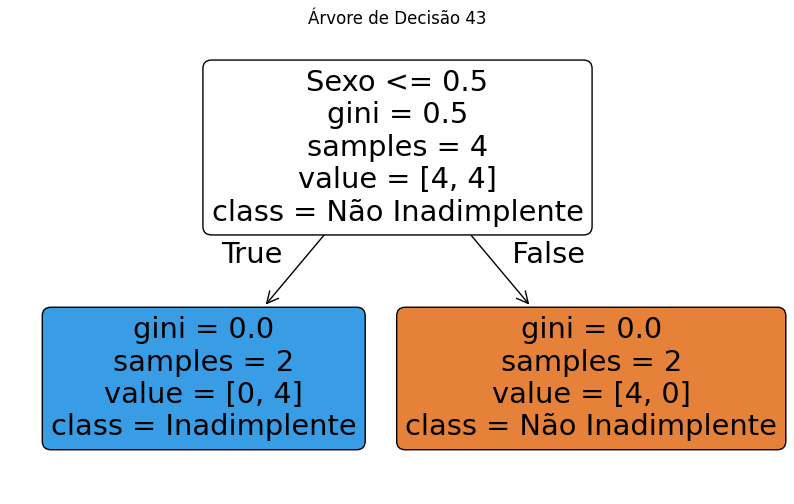

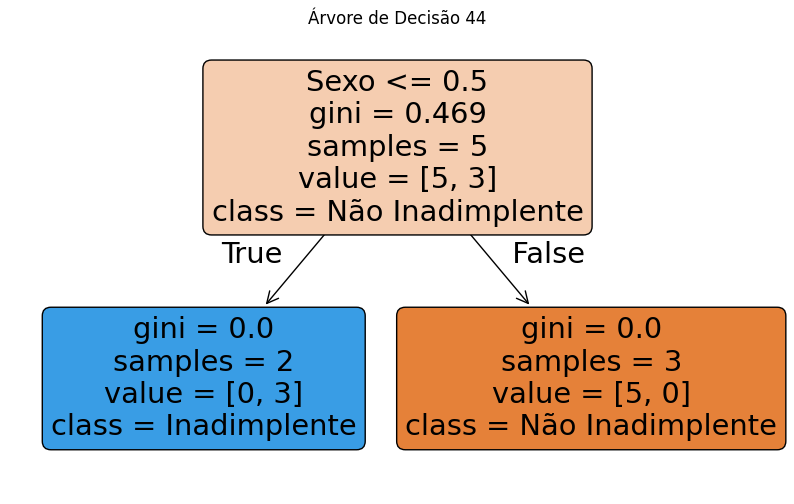

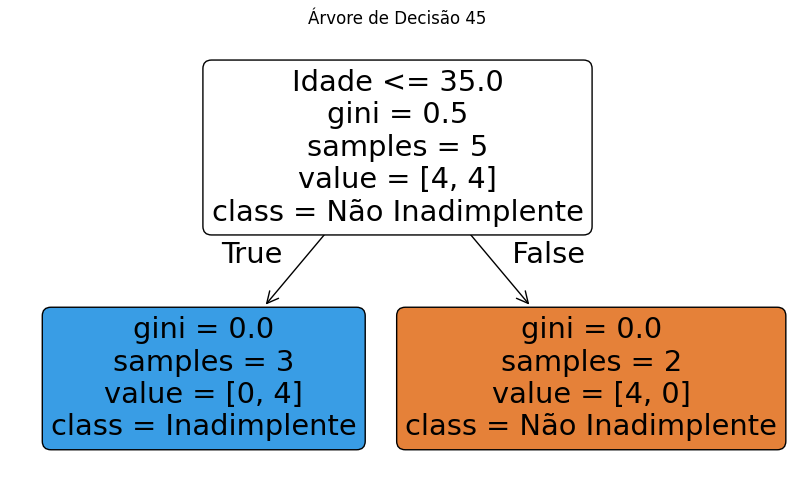

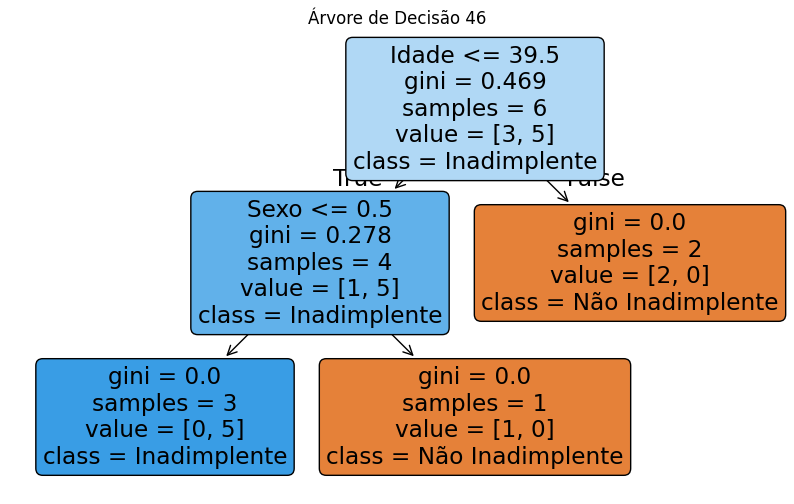

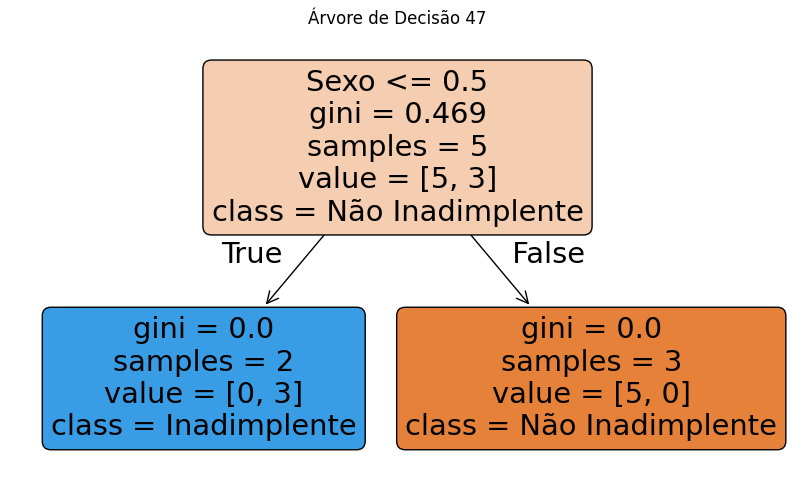

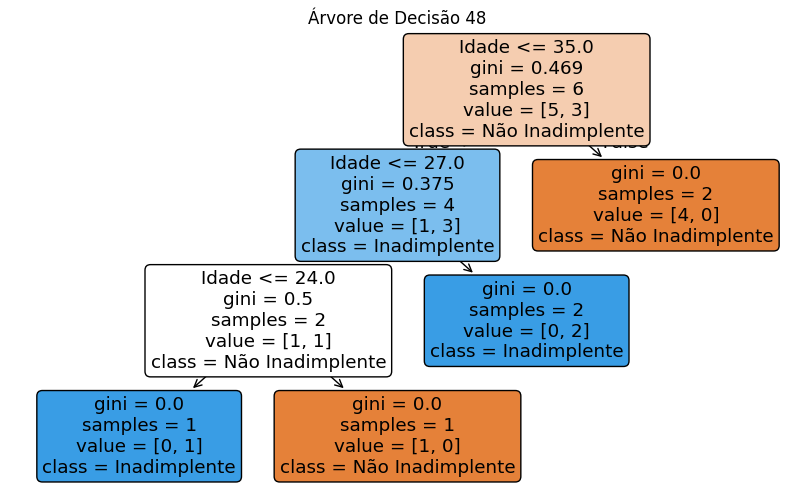

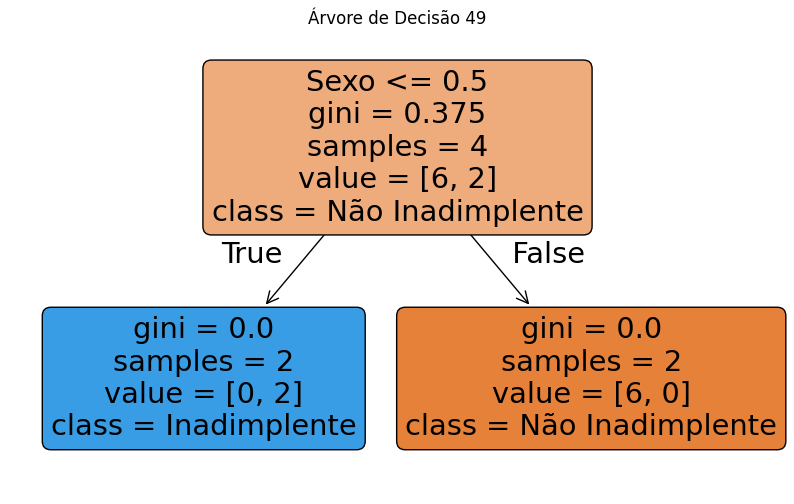

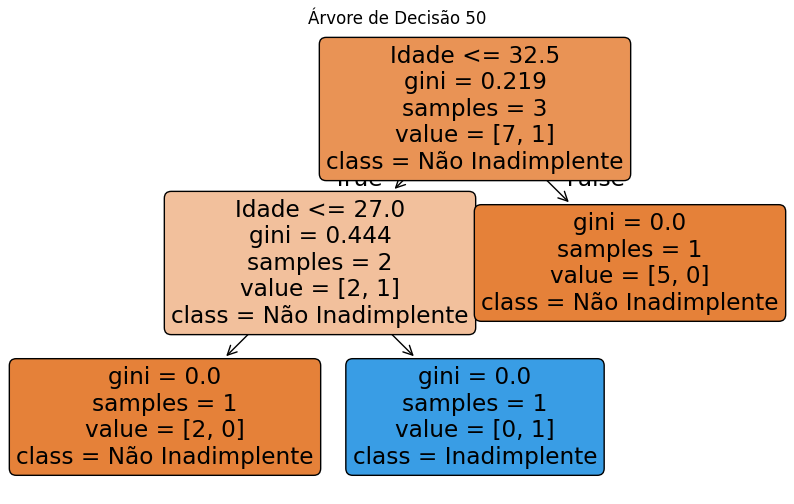

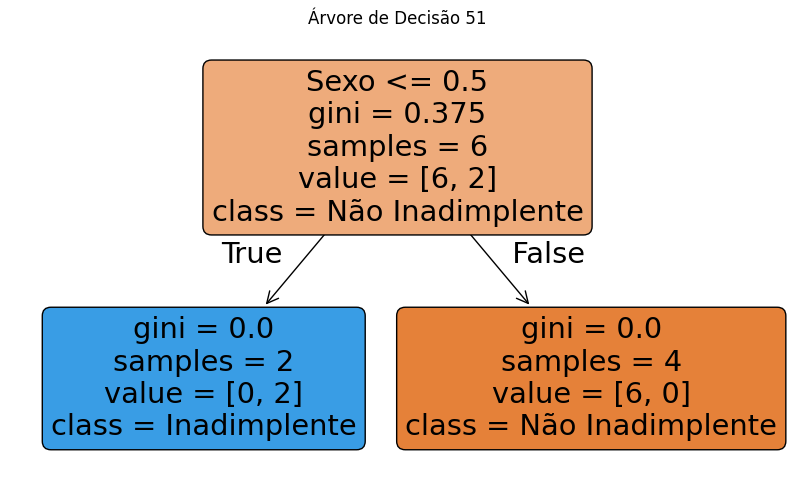

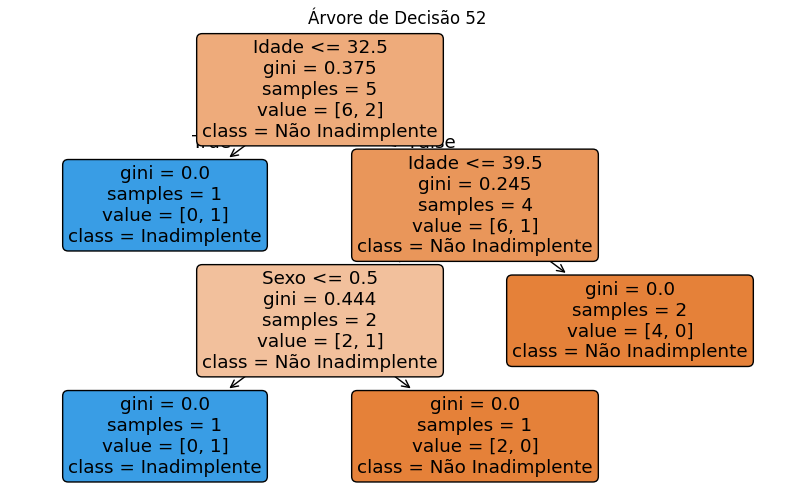

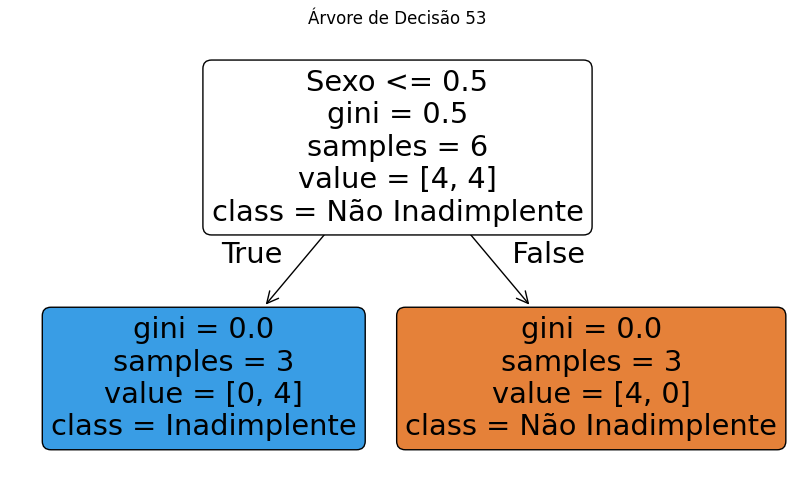

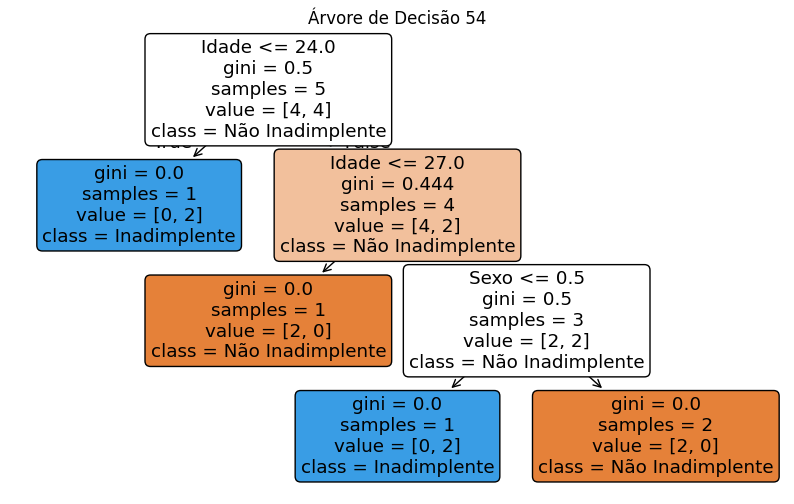

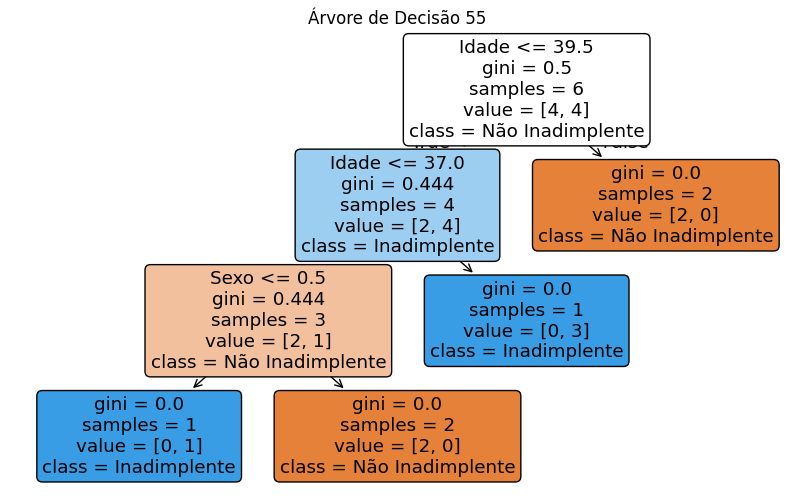

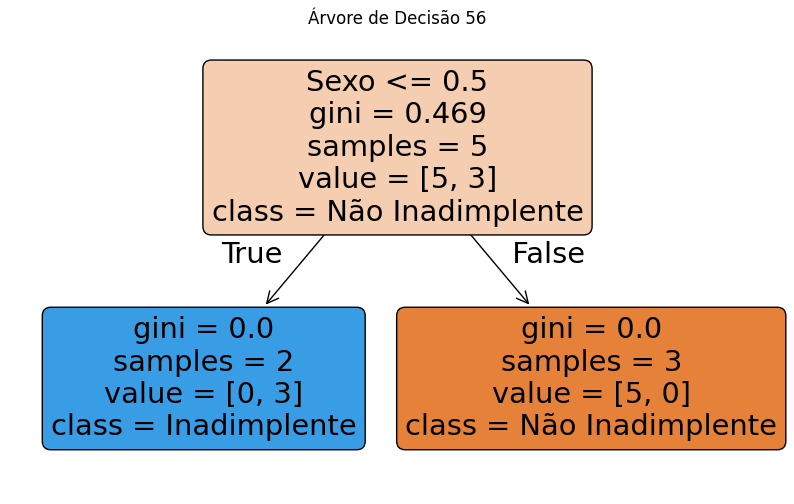

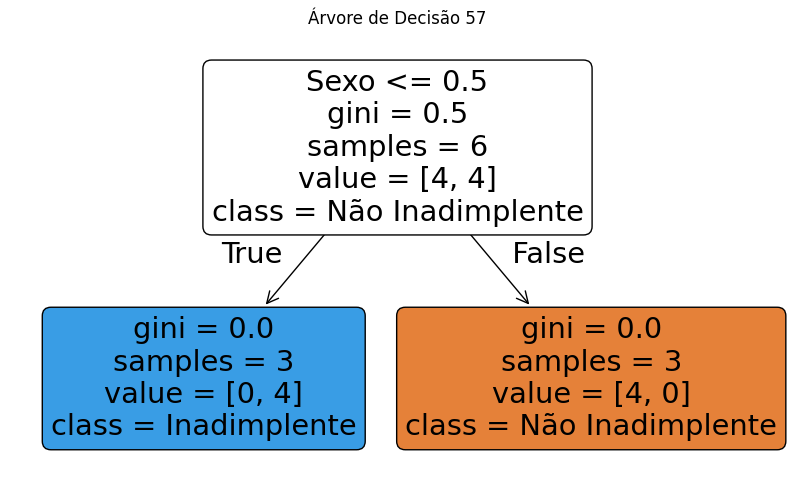

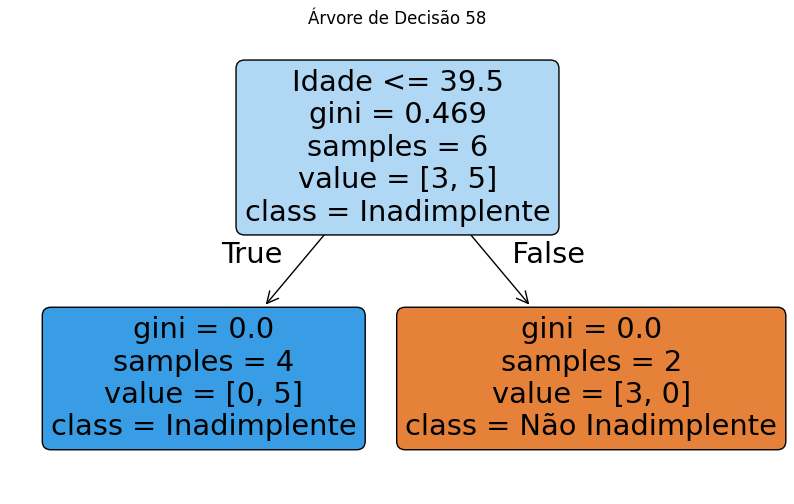

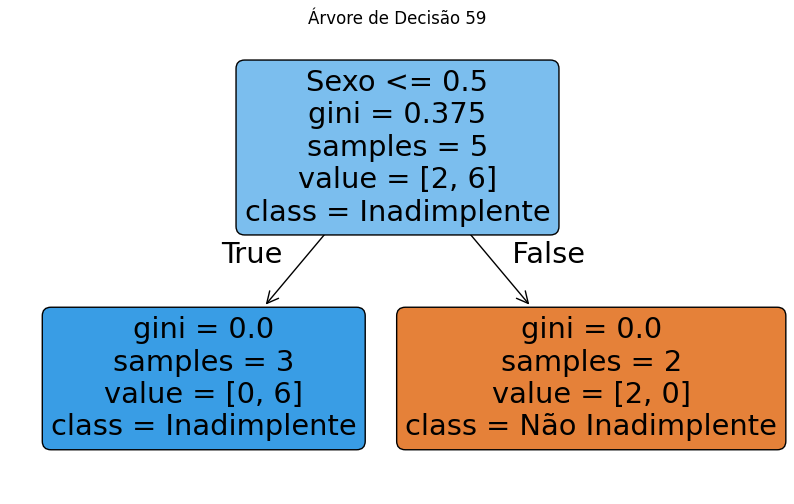

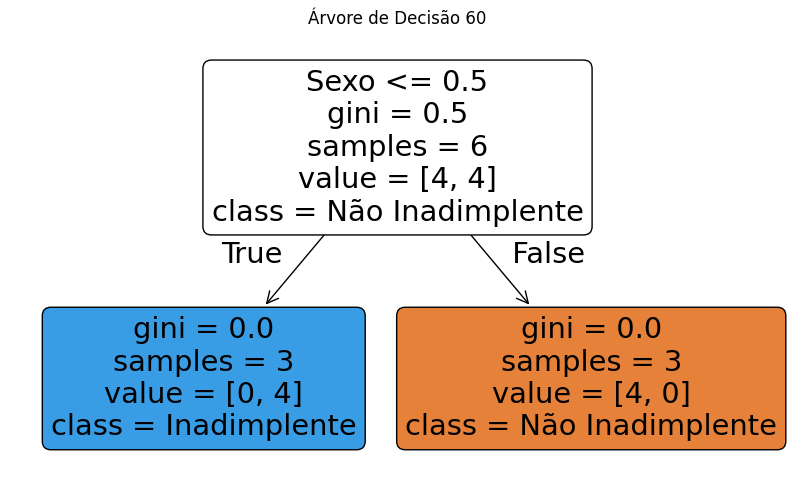

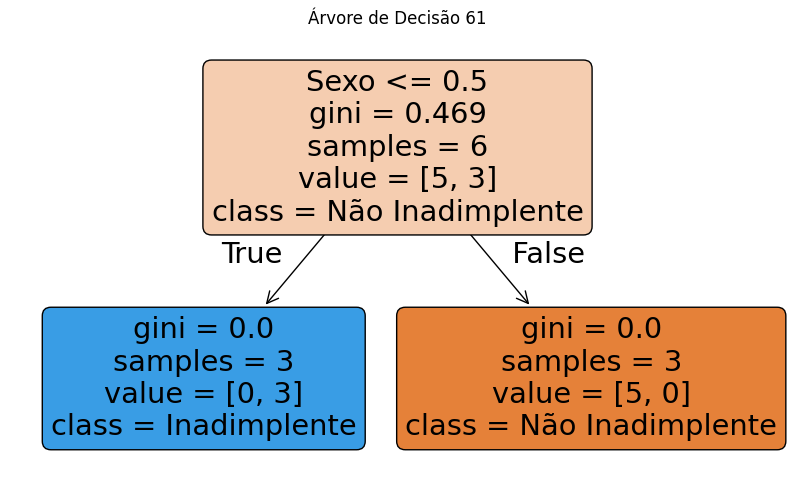

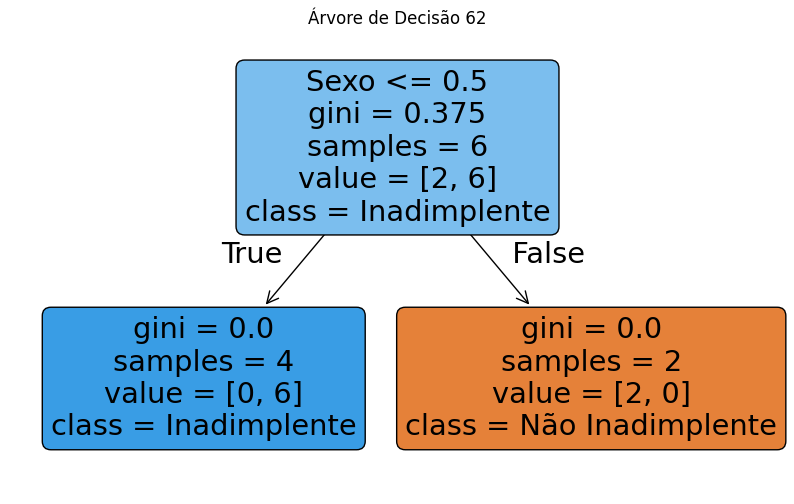

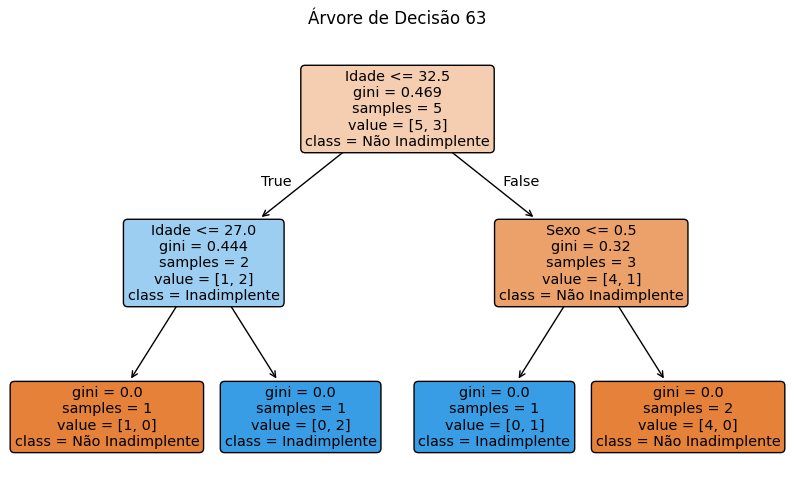

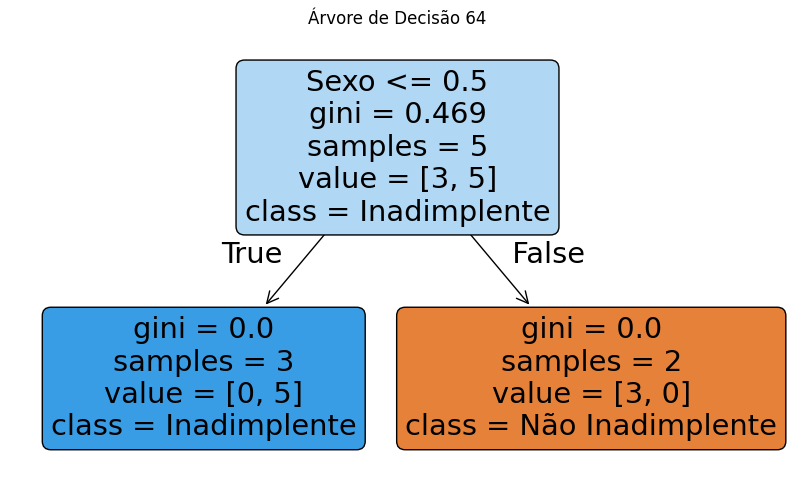

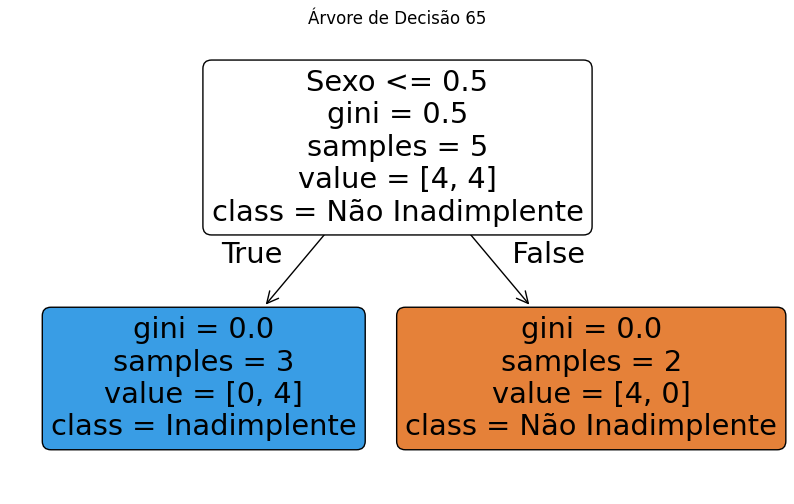

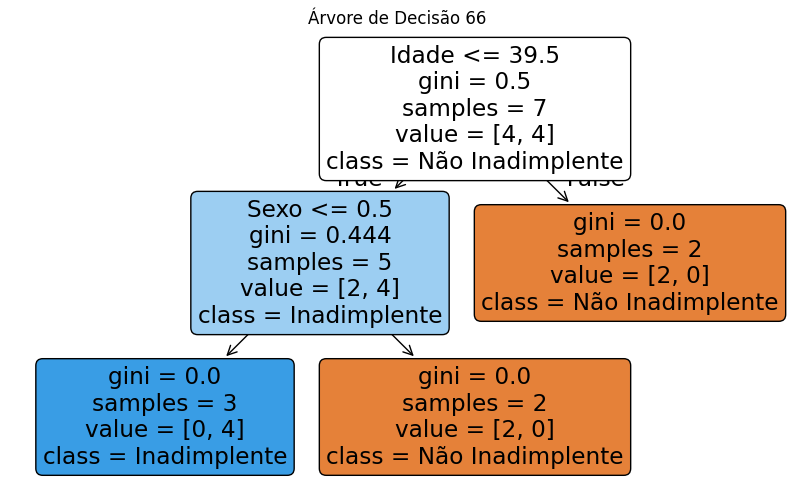

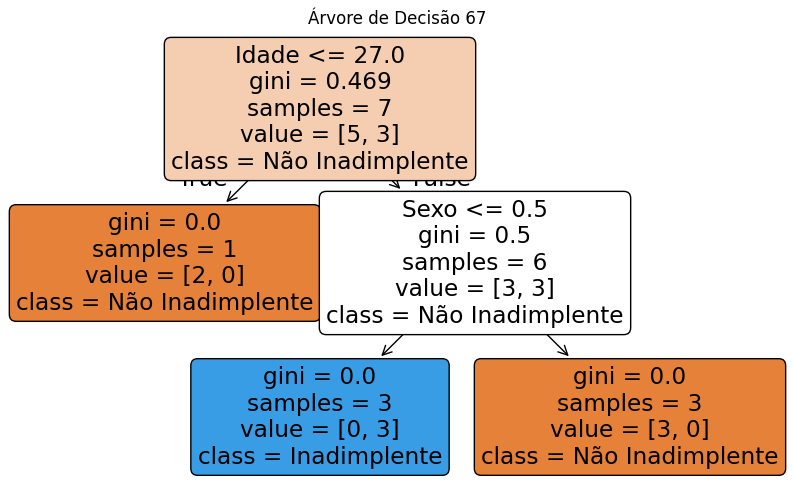

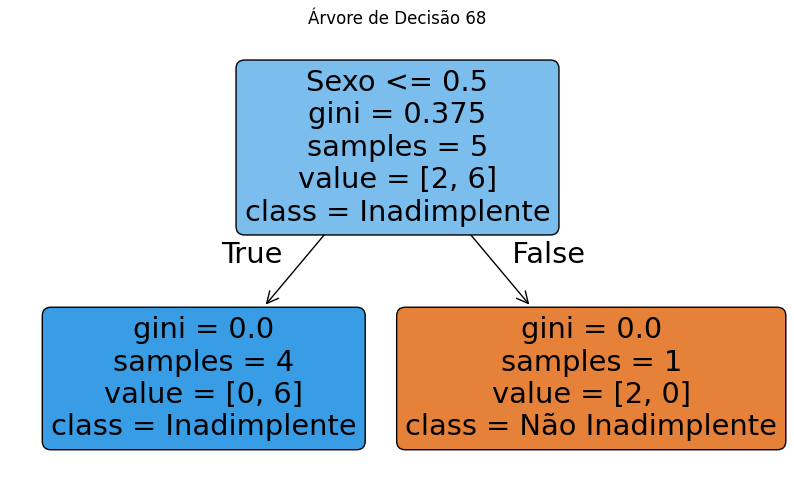

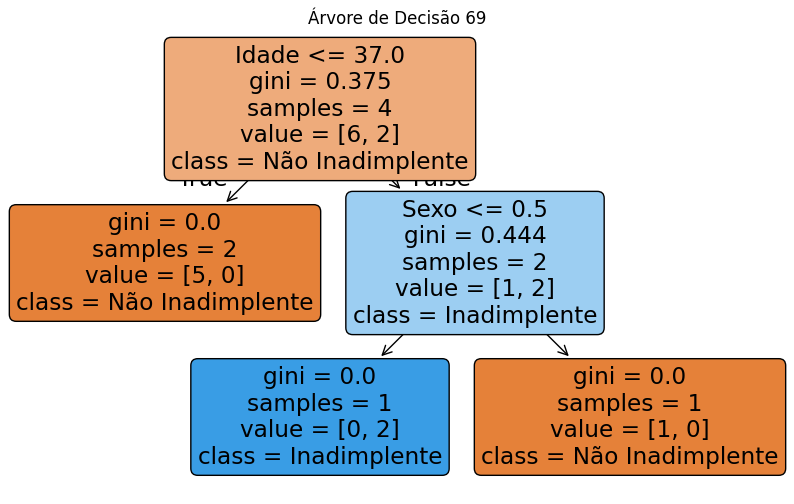

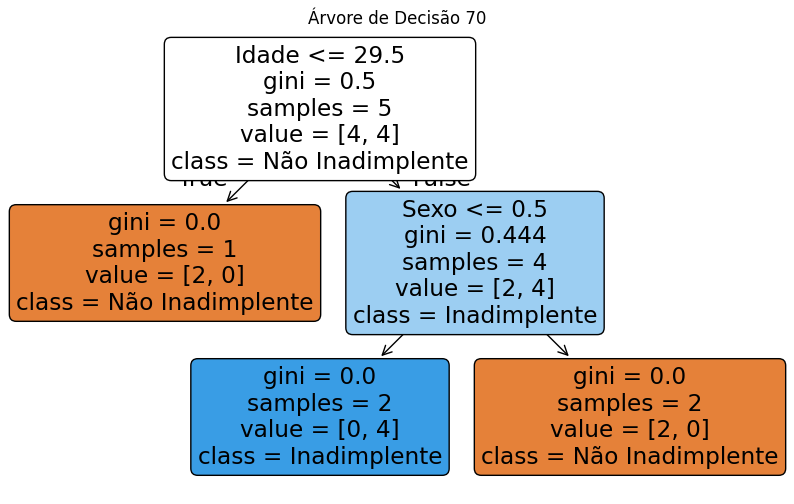

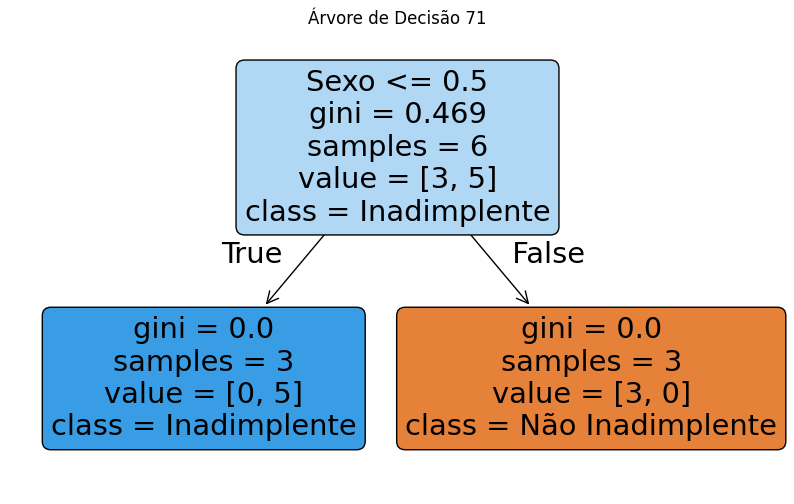

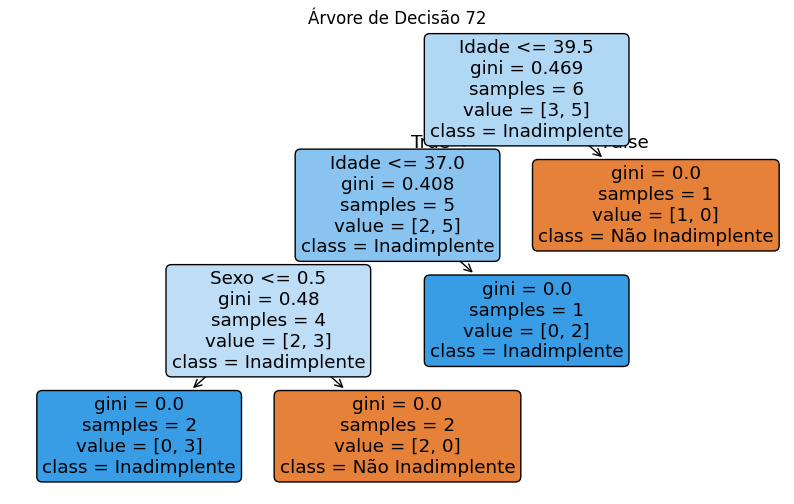

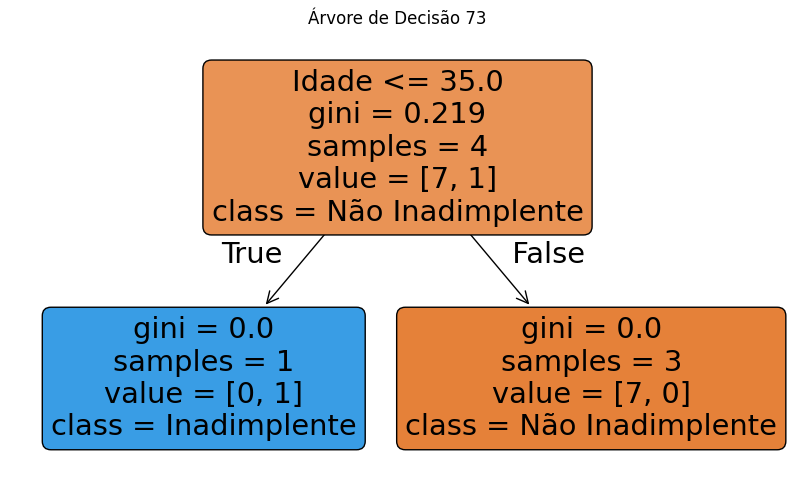

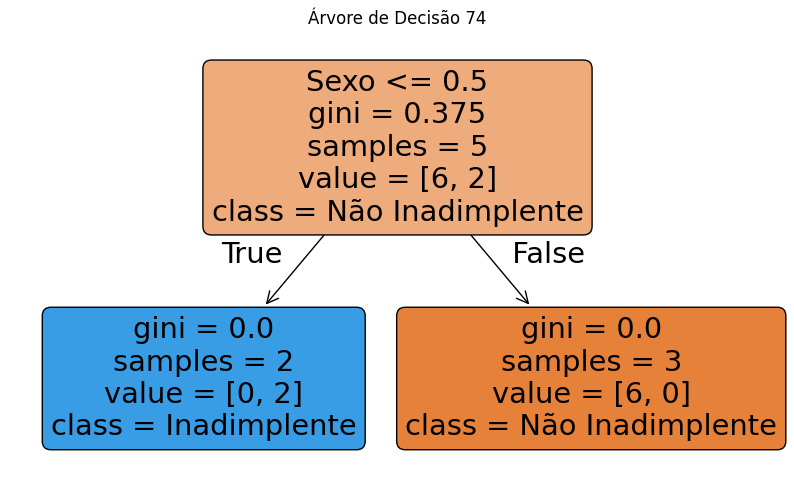

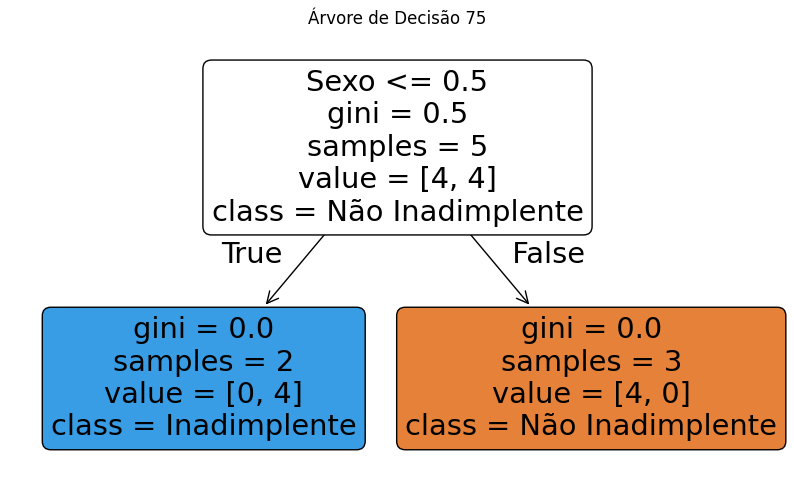

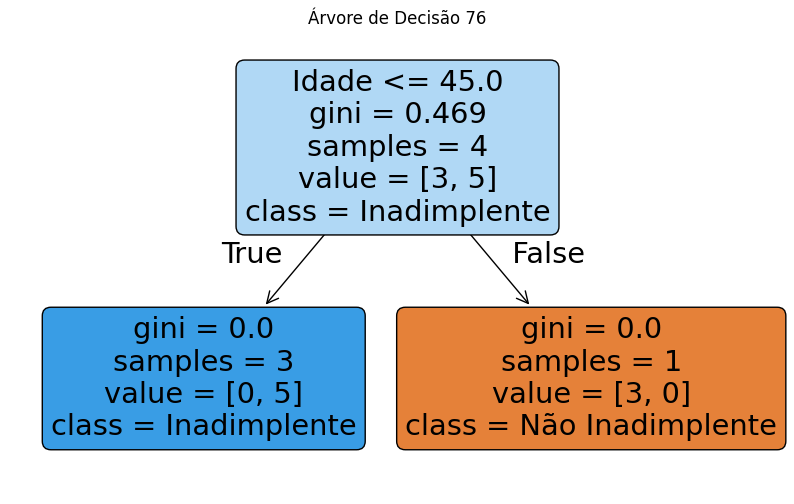

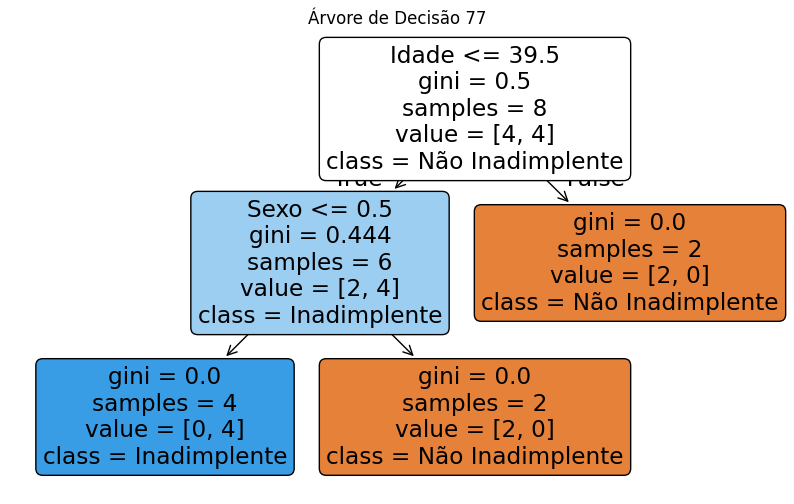

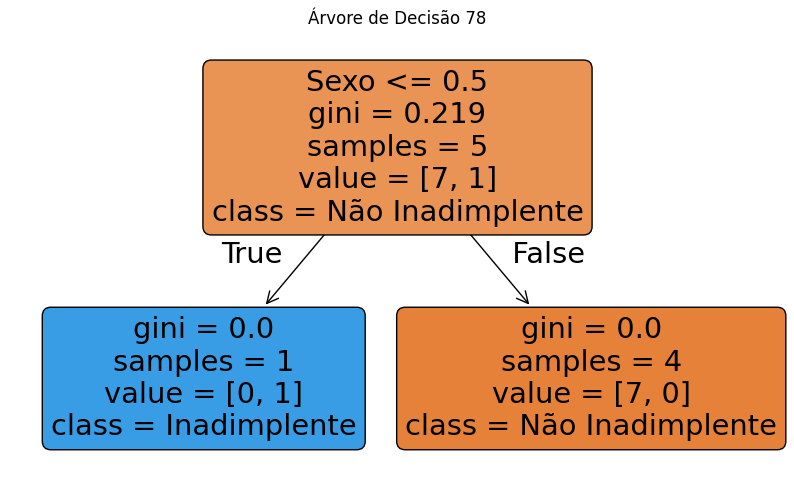

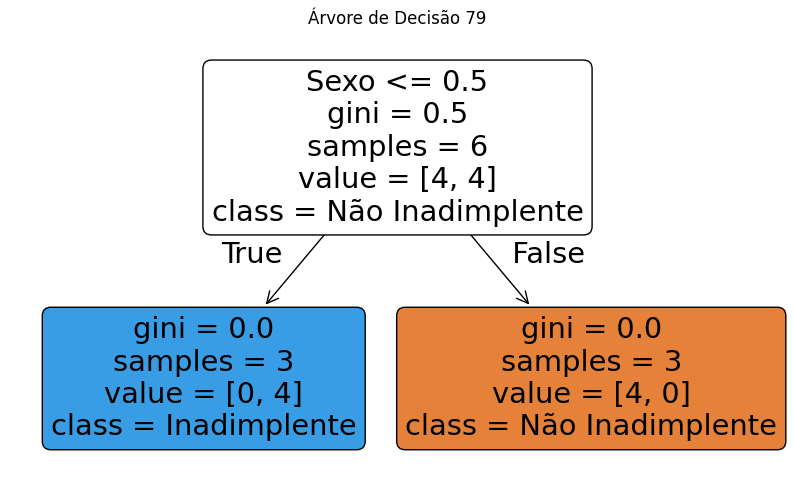

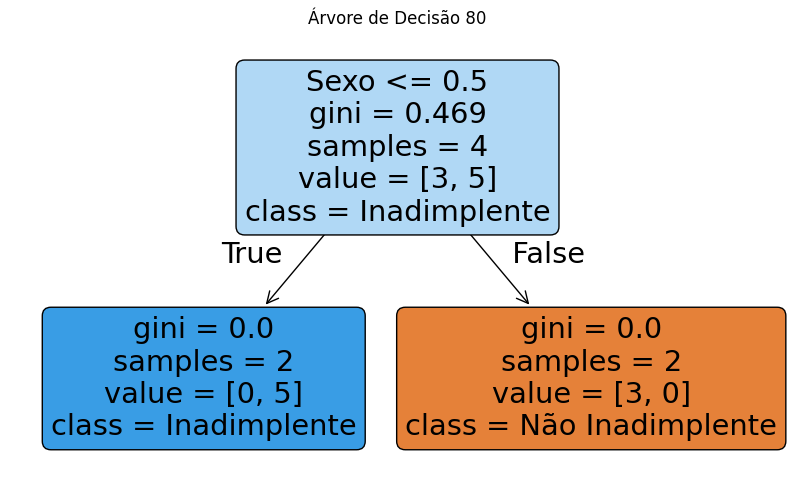

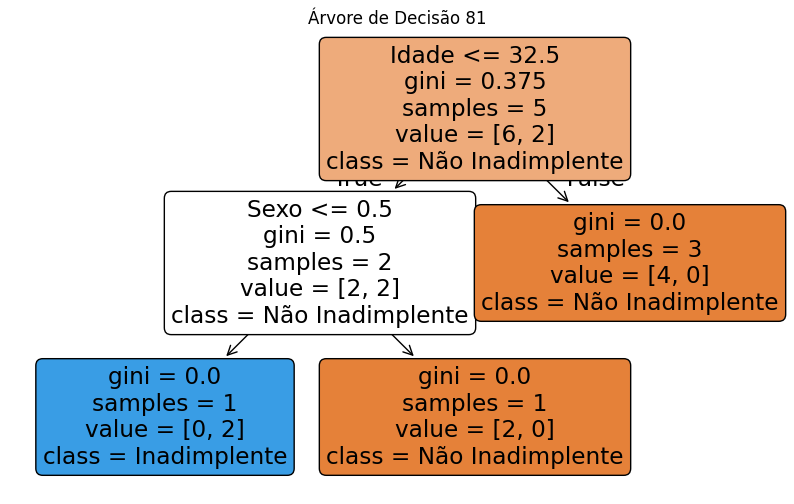

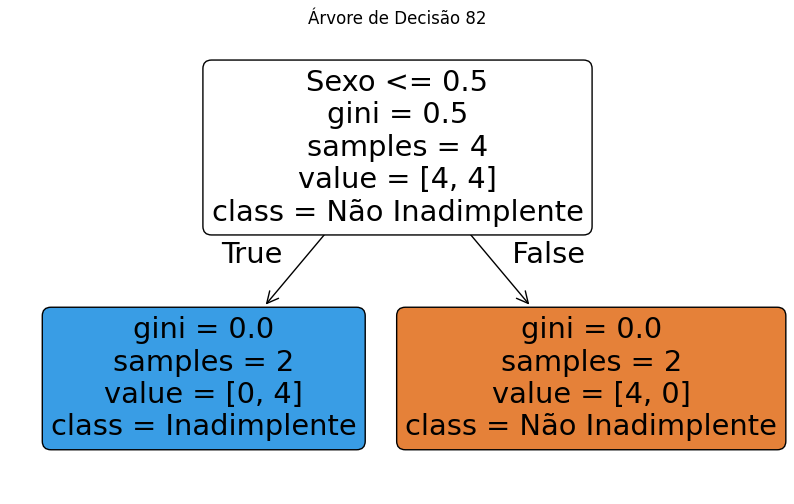

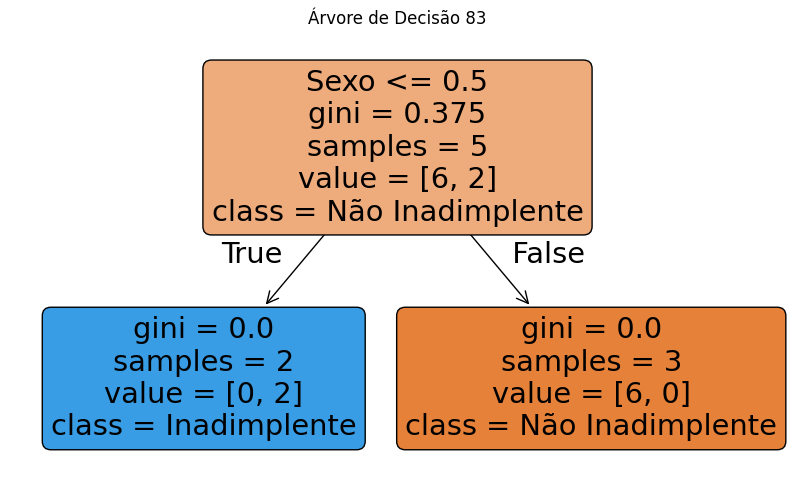

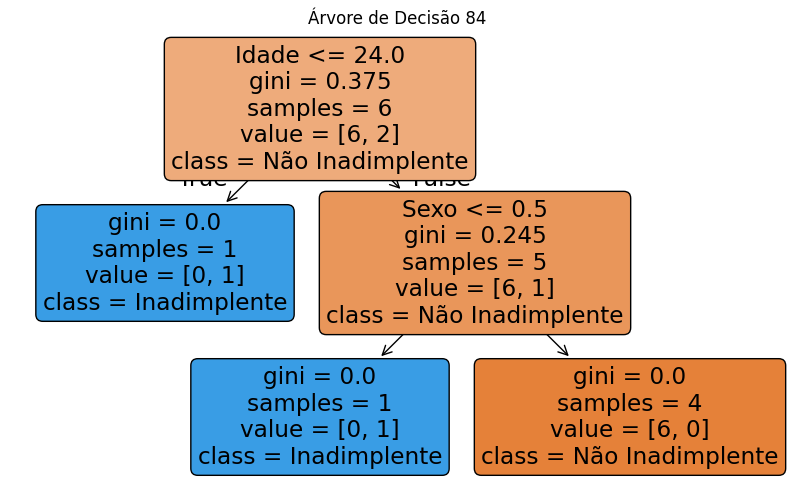

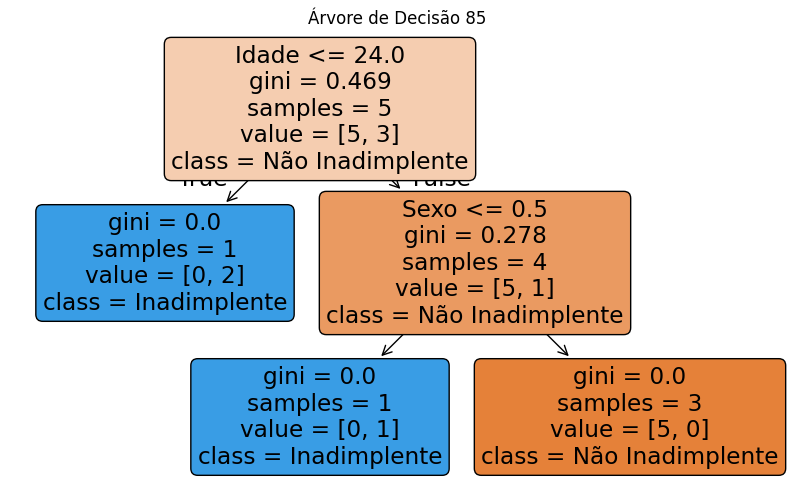

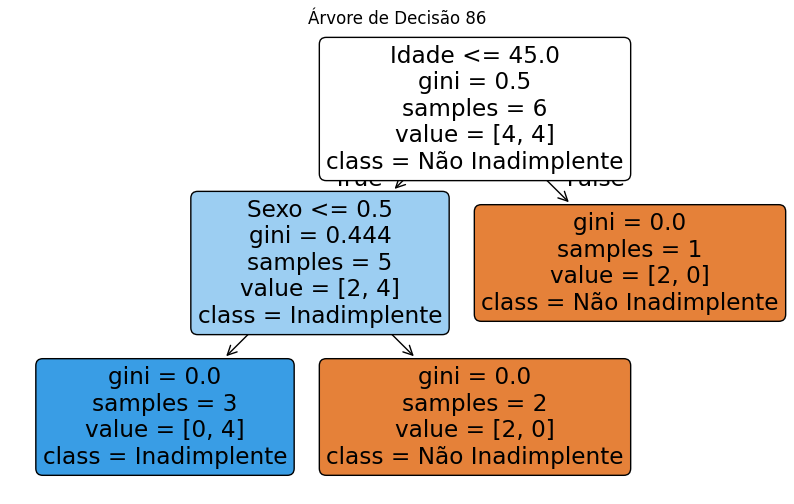

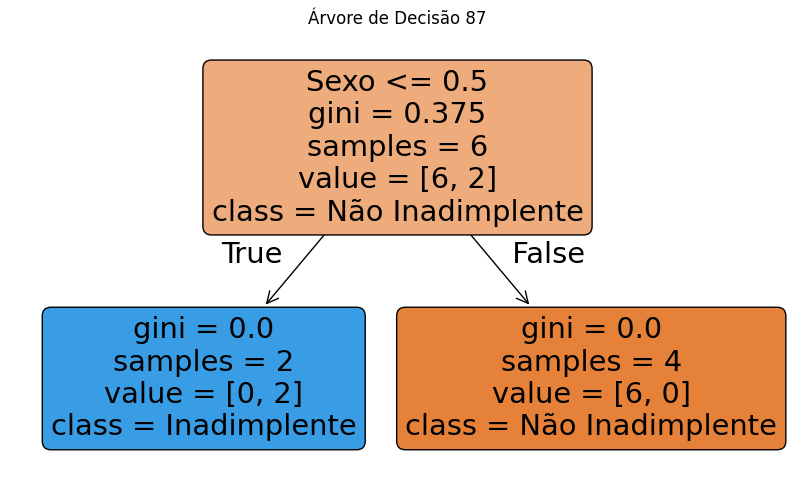

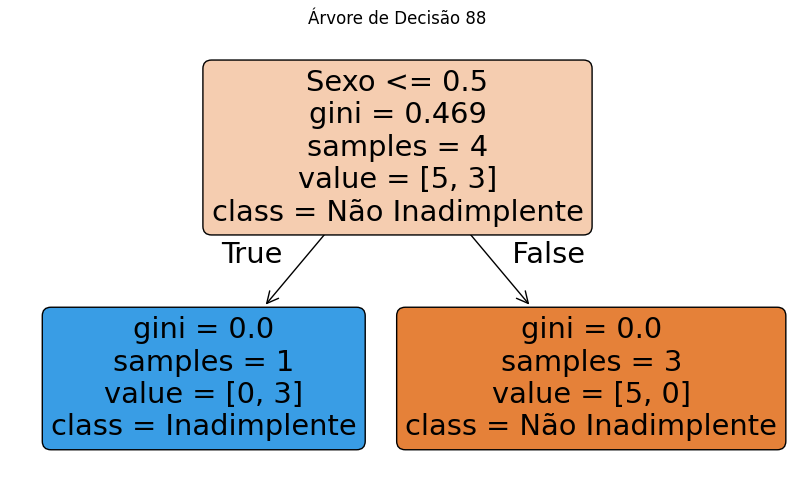

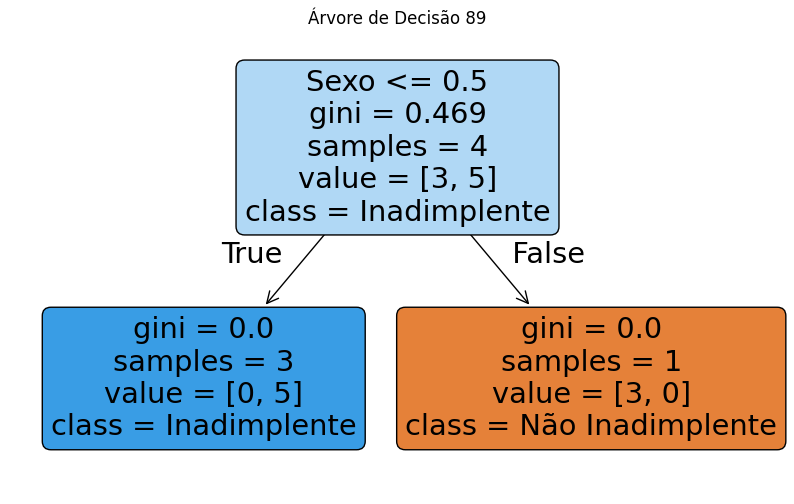

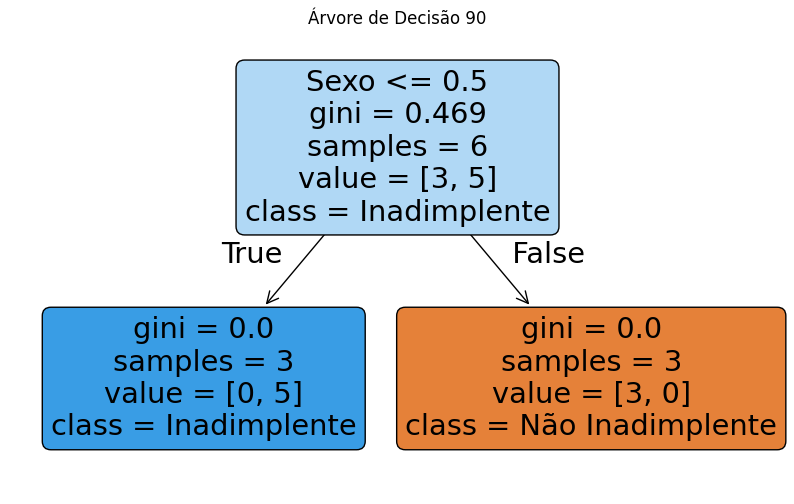

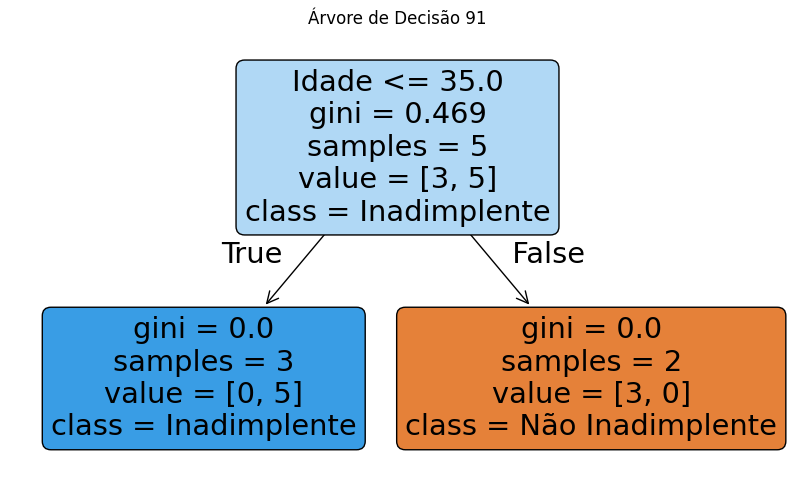

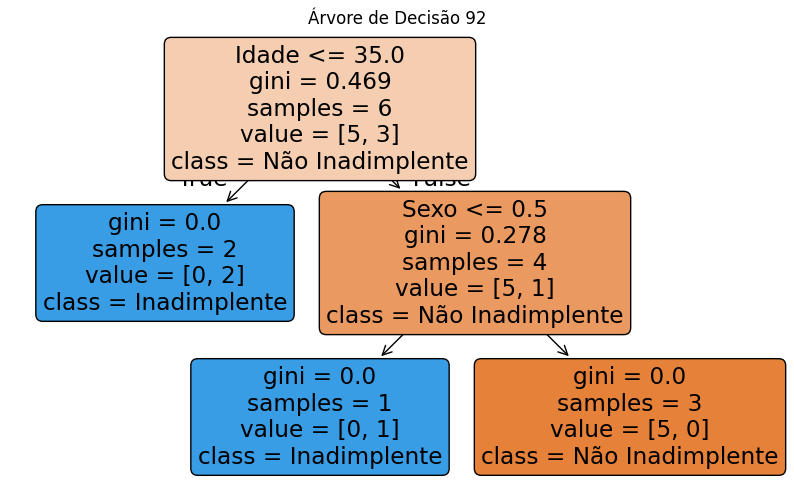

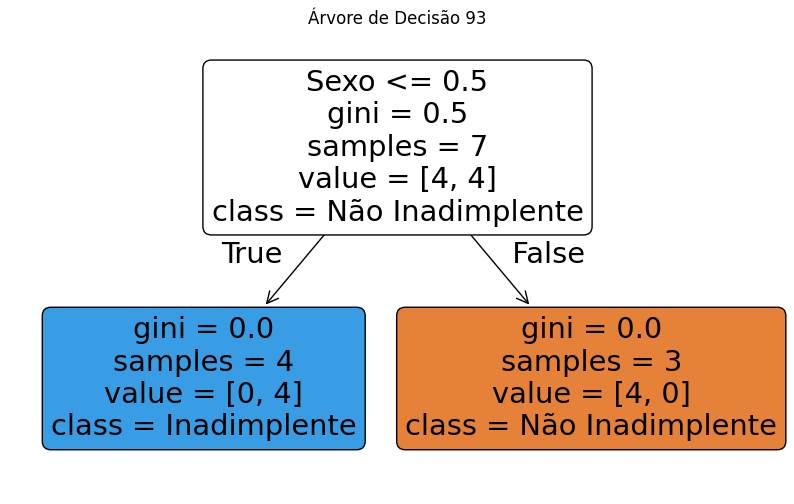

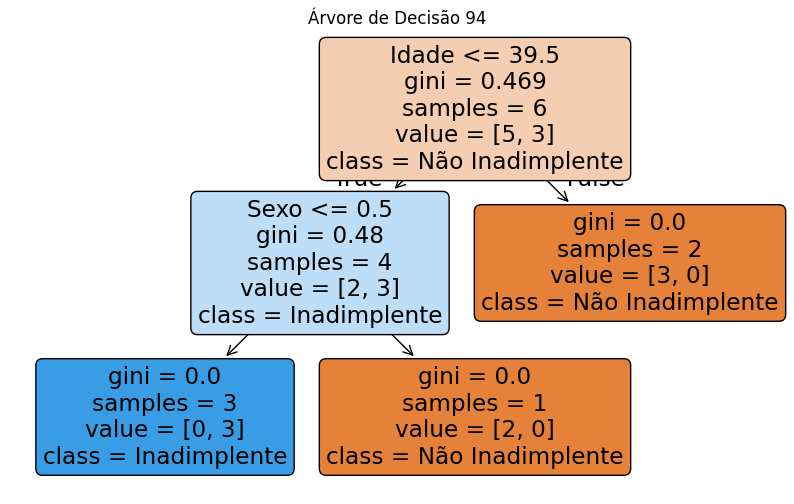

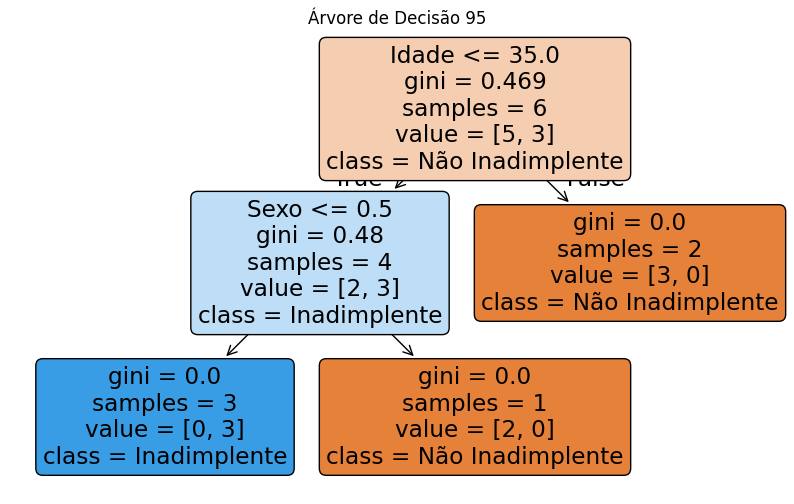

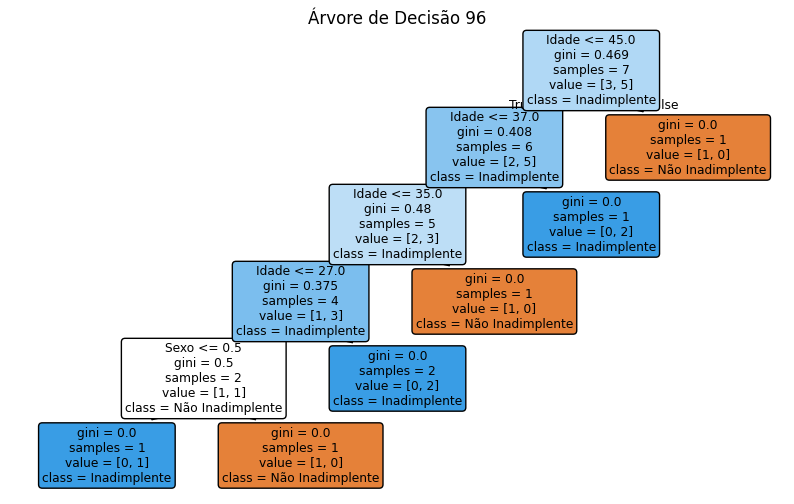

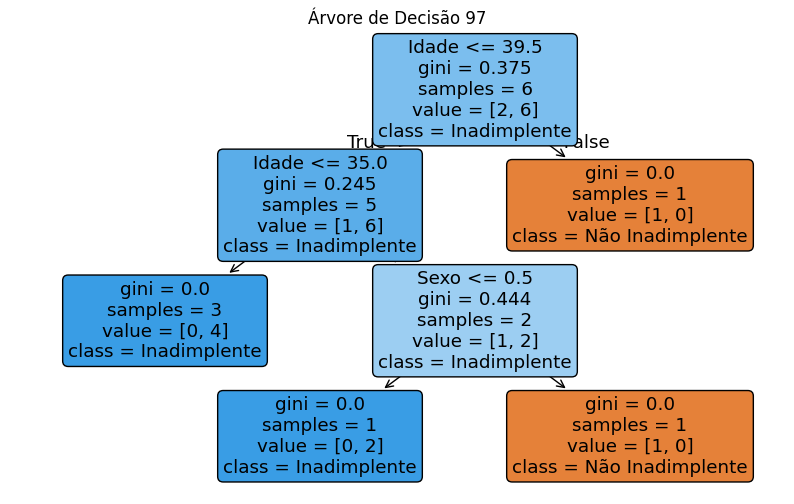

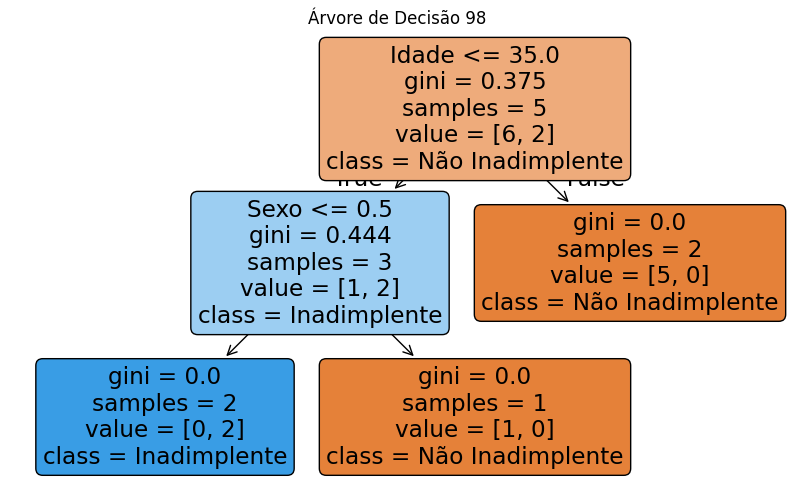

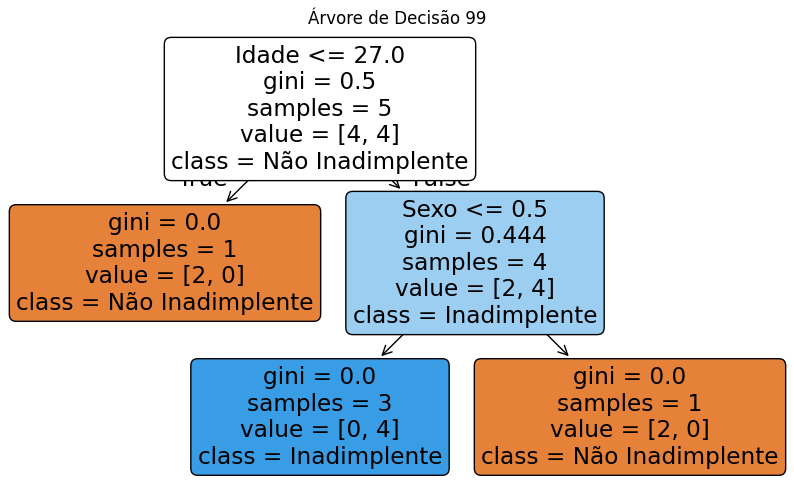

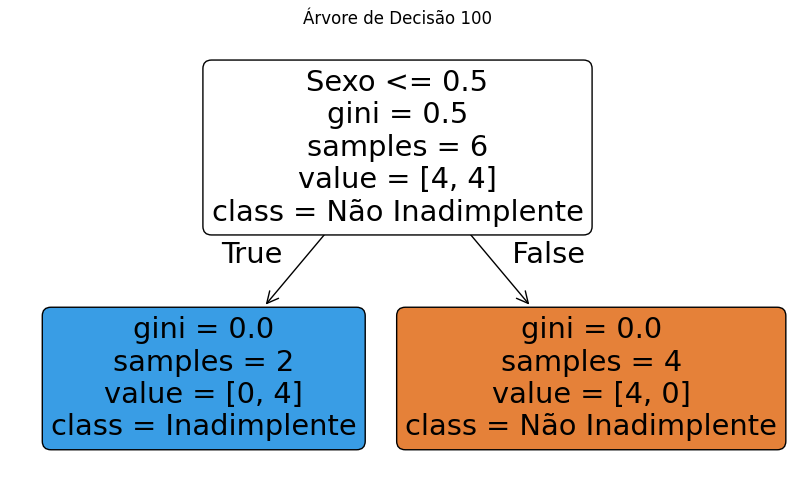

In [11]:
# Plotando as árvores de decisão
for i, tree in enumerate(model.estimators_):
    plt.figure(figsize=(10,6))
    plot_tree(tree, feature_names=['Idade', 'Sexo'], class_names=['Não Inadimplente', 'Inadimplente'], filled=True, rounded=True)
    plt.title(f'Árvore de Decisão {i+1}')
    plt.show()

In [17]:
y_pred

array([0, 1], dtype=int64)

In [32]:
# Calculando as probabilidades de inadimplência
probabilidades = model.predict_proba(df[['Idade', 'Sexo']])[:, 1]

# Adicionando a coluna de probabilidades ao DataFrame
df['Probabilidade_Inadimplente'] = probabilidades

In [33]:
df

Idade  Sexo  Inadimplente  Probabilidade_Inadimplente
0      25     0             1                        0.97
1      44     1             0                        0.02
2      20     0             1                        0.97
3      39     1             0                        0.02
4      22     0             1                        0.97
5      48     1             0                        0.03
6      21     0             1                        0.97
7      53     1             0                        0.03
8      26     0             1                        0.97
9      50     1             0                        0.05
10     50     0             1                        0.81

In [24]:
df[df['Inadimplente'] == 1]

Idade  Sexo  Inadimplente  Probabilidade_Inadimplente
1     34     0             1                        0.94
3     29     0             1                        0.97
5     38     0             1                        0.85
7     23     0             1                        0.93
9     30     0             1                        0.99